In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore", category=FutureWarning)

sampled_data = pd.read_csv('/content/drive/My Drive/amex_stratified_sample_40k.csv')

 # Define categorical features
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117',
                           'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']



In [5]:
# # Let's look at just a small piece of the data first
# train_data = pd.read_csv('../input/amex-default-prediction/train_data.csv', nrows=1000)

# How big is the full dataset?
# !ls -la ../input/amex-default-prediction/

In [6]:
# # Understanding how the data look like?
# print(f"Our sample has {train_data.shape[0]} rows and {train_data.shape[1]} columns")

# # first few rows to understand what's in each column
# train_data.head()

# # checking the types of data do we have in each column?
# train_data.dtypes.value_counts()

# # checking for any missing data?
# missing_values = train_data.isnull().sum() / len(train_data) * 100
# missing_values = missing_values.sort_values(ascending=False)
# print("Top 10 columns with missing values (%):")
# print(missing_values.head(10))

In [7]:
# # Let's create a strategy to look at the full dataset
# def get_stratified_sample(file_path, sample_frac=0.1, chunksize=100000):
#     """
#     Create a sample that keeps the same proportion of defaults and non-defaults
#     """
#     # First, get the target variable from a separate file to guide our sampling
#     targets = pd.read_csv('../input/amex-default-prediction/train_labels.csv')

#     # Find out how many defaults (1) and non-defaults (0) we have
#     target_counts = targets['target'].value_counts()
#     print(f"Full dataset has {target_counts[0]} non-defaults and {target_counts[1]} defaults")
#     print(f"Default rate: {target_counts[1]/len(targets)*100:.2f}%")

#     # Create empty lists to hold our sampled data
#     default_samples = []
#     non_default_samples = []

#     # Process the file in chunks to avoid memory issues
#     for chunk_num, chunk in enumerate(pd.read_csv(file_path, chunksize=chunksize)):
#         print(f"Processing chunk {chunk_num+1}...")

#         # Join the chunk with target labels
#         chunk = chunk.merge(targets, on='customer_ID', how='left')

#         # Sample from defaults and non-defaults separately
#         defaults = chunk[chunk['target'] == 1].sample(frac=sample_frac, random_state=42)
#         non_defaults = chunk[chunk['target'] == 0].sample(frac=sample_frac, random_state=42)

#         default_samples.append(defaults)
#         non_default_samples.append(non_defaults)

#     # Combine all our samples
#     all_defaults = pd.concat(default_samples)
#     all_non_defaults = pd.concat(non_default_samples)

#     # Create the final sample with the same proportion of defaults as the original
#     final_sample = pd.concat([all_defaults, all_non_defaults])

#     print(f"Created sample with {len(final_sample)} rows")
#     print(f"Sample default rate: {len(all_defaults)/len(final_sample)*100:.2f}%")

#     return final_sample

# # Get our sample - this might take a little while
# sampled_data = get_stratified_sample('../input/amex-default-prediction/train_data.csv')

# # Save our sample for future use
# sampled_data.to_csv('amex_sample.csv', index=False)

In [8]:
# #sampling 40,000 rows with default rate of 4%
# sampled_data = get_stratified_sample(
#     '../input/amex-default-prediction/train_data.csv',
#     sample_frac=0.008,  # This should give ~44,000 rows
#     chunksize=250000    # Process in chunks of 250k rows
# )

# # Check our final sample size
# print(f"Final sample size: {len(sampled_data)} rows")

# # Save for future use
# sampled_data.to_csv('amex_stratified_sample_40k.csv', index=False)

Features with missing values: 116

Top 10 features with highest percentage of missing values:
D_87     99.927685
D_88     99.868930
D_108    99.405663
D_110    99.380805
D_111    99.380805
B_39     99.331089
D_73     99.001153
B_42     98.653138
D_138    96.483695
D_136    96.483695
dtype: float64


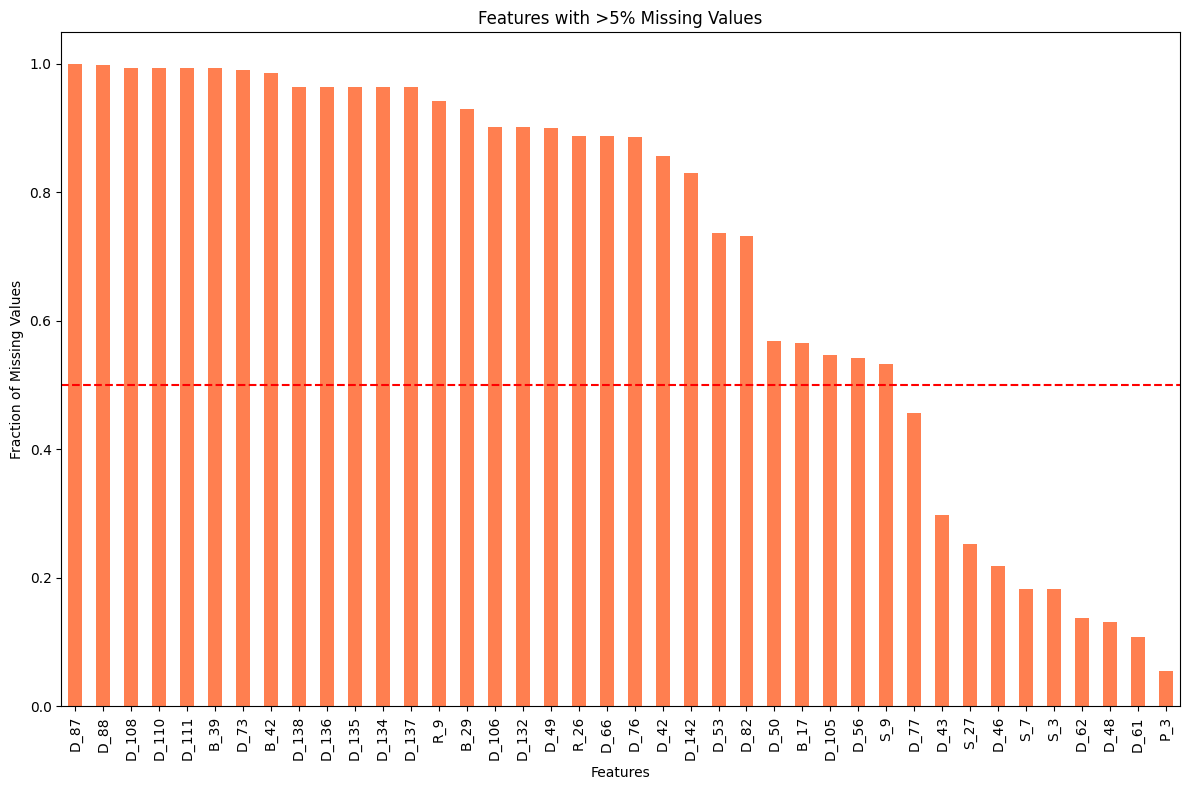

Features with >90% missing: 18
Features with 50-90% missing: 12
Features with 10-50% missing: 9
Features with <10% missing: 77

Missing values for D_77:
Non-default (0): 40.24%
Default (1): 62.12%

Missing values for D_43:
Non-default (0): 33.08%
Default (1): 20.17%

Missing values for S_27:
Non-default (0): 27.96%
Default (1): 16.90%

Missing values for D_46:
Non-default (0): 23.34%
Default (1): 17.07%

Missing values for S_7:
Non-default (0): 21.73%
Default (1): 7.66%
Dropped 18 features with >90% missing values
Added missing category to 10 categorical features
Filled 11 high-missing numerical features with -999
Filled 9 moderate-missing numerical features with median
Filled 68 low-missing numerical features with median

Remaining missing values: 0
Shape before: (44251, 191)
Shape after: (44251, 173)


In [9]:
  # Analyze patterns of missing values
missing_values = sampled_data.isnull().mean().sort_values(ascending=False)
print(f"Features with missing values: {sum(missing_values > 0)}")
print("\nTop 10 features with highest percentage of missing values:")
print(missing_values.head(10) * 100)  # Convert to percentage

# Visualize missing values
plt.figure(figsize=(12, 8))
missing_values_to_plot = missing_values[missing_values > 0.05]  # Features with >5% missing
missing_values_to_plot.plot(kind='bar', color='coral')
plt.title('Features with >5% Missing Values')
plt.xlabel('Features')
plt.ylabel('Fraction of Missing Values')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% missing')
plt.tight_layout()
plt.show()

# Group features by their missing value percentages
extreme_missing = missing_values[missing_values > 0.9].index.tolist()
high_missing = missing_values[(missing_values > 0.5) & (missing_values <= 0.9)].index.tolist()
moderate_missing = missing_values[(missing_values > 0.1) & (missing_values <= 0.5)].index.tolist()
low_missing = missing_values[(missing_values > 0) & (missing_values <= 0.1)].index.tolist()

print(f"Features with >90% missing: {len(extreme_missing)}")
print(f"Features with 50-90% missing: {len(high_missing)}")
print(f"Features with 10-50% missing: {len(moderate_missing)}")
print(f"Features with <10% missing: {len(low_missing)}")

# Check if missing values pattern relates to the target - FIXED CODE
# Example: Are missing values more common in default vs non-default cases?
if len(moderate_missing) >= 5:
    for feature in moderate_missing[:5]:  # Check first 5 moderate missing features
        # First calculate null indicators, then group by target
        null_indicators = sampled_data[feature].isnull()
        missing_by_target = null_indicators.groupby(sampled_data['target']).mean()

        print(f"\nMissing values for {feature}:")
        if 0 in missing_by_target.index:
            print(f"Non-default (0): {missing_by_target[0]*100:.2f}%")
        if 1 in missing_by_target.index:
            print(f"Default (1): {missing_by_target[1]*100:.2f}%")
else:
    print("\nNot enough features with moderate missing values to check patterns")

# Handling missing values based on percentage
def handle_missing_values(data):
    data_processed = data.copy()

    # 1. Drop features with extreme missingness (>90%)
    if extreme_missing:
        data_processed = data_processed.drop(columns=extreme_missing)
        print(f"Dropped {len(extreme_missing)} features with >90% missing values")
    else:
        print("No features with >90% missing values to drop")

    # 2. For categorical features with missing values, create a "Missing" category
    cat_features_with_missing = []
    for feature in [f for f in categorical_features if f in data_processed.columns]:
        if data_processed[feature].isnull().sum() > 0:
            # Replace NaN with a new category (e.g., -999)
            data_processed[feature] = data_processed[feature].fillna(-999)
            cat_features_with_missing.append(feature)

    print(f"Added missing category to {len(cat_features_with_missing)} categorical features")

    # 3. For numerical features:
    # a. High missing features (50-90%): Replace with -999 (missing indicator)
    for feature in high_missing:
        if feature in data_processed.columns and feature not in categorical_features:
            data_processed[feature] = data_processed[feature].fillna(-999)

    print(f"Filled {len([f for f in high_missing if f in data_processed.columns and f not in categorical_features])} high-missing numerical features with -999")

    # b. Moderate missing features (10-50%): Fill with median
    for feature in moderate_missing:
        if feature in data_processed.columns and feature not in categorical_features:
            median_value = data_processed[feature].median()
            data_processed[feature] = data_processed[feature].fillna(median_value)

    print(f"Filled {len([f for f in moderate_missing if f in data_processed.columns and f not in categorical_features])} moderate-missing numerical features with median")

    # c. Low missing features (<10%): Fill with median
    for feature in low_missing:
        if feature in data_processed.columns and feature not in categorical_features:
            median_value = data_processed[feature].median()
            data_processed[feature] = data_processed[feature].fillna(median_value)

    print(f"Filled {len([f for f in low_missing if f in data_processed.columns and f not in categorical_features])} low-missing numerical features with median")

    return data_processed

# Apply missing value handling
sampled_data_processed = handle_missing_values(sampled_data)

# Verify no missing values remain
remaining_missing = sampled_data_processed.isnull().sum().sum()
print(f"\nRemaining missing values: {remaining_missing}")

# Check before and after shapes
print(f"Shape before: {sampled_data.shape}")
print(f"Shape after: {sampled_data_processed.shape}")

B_30: 3 unique values
B_38: 7 unique values
D_114: 2 unique values
D_116: 2 unique values
D_117: 7 unique values
D_120: 2 unique values
D_126: 3 unique values
D_63: 6 unique values
D_64: 4 unique values
D_66: 2 unique values
D_68: 7 unique values


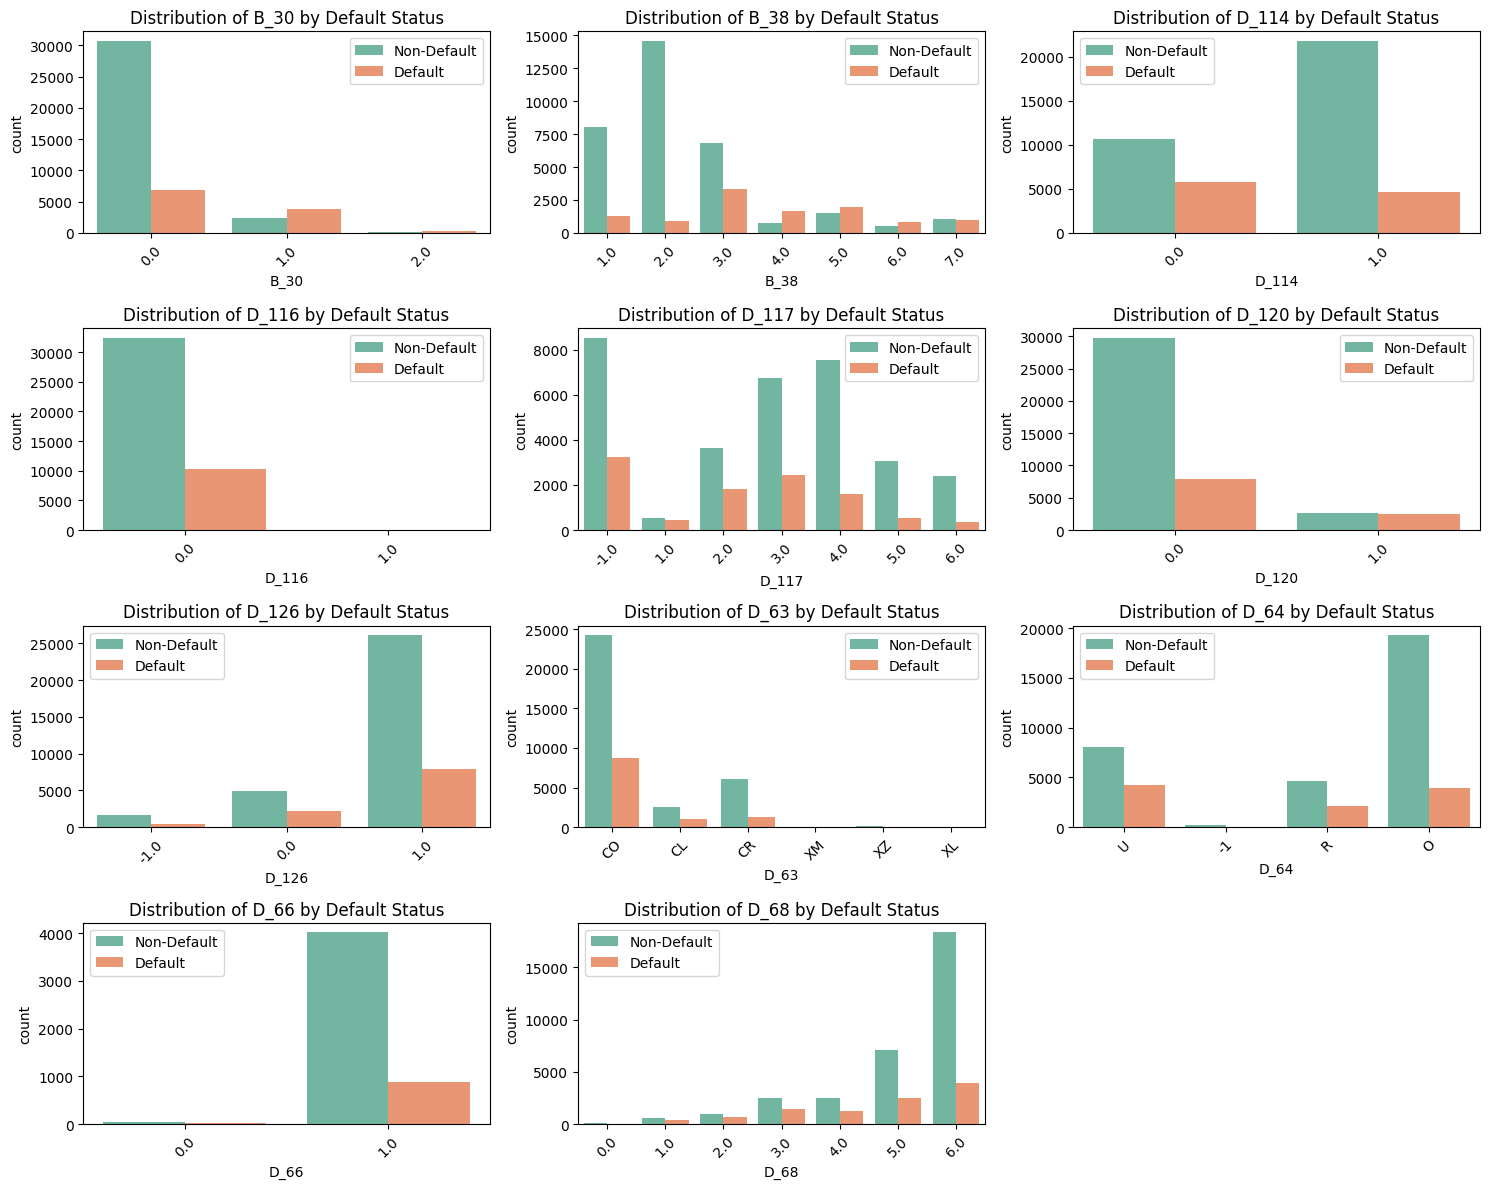

In [10]:
#check for this first without handling missing values, forgot to do that which was a big mistake
# Let's identify our categorical features
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# How many unique values does each categorical feature have?
for feature in categorical_features:
    unique_values = sampled_data[feature].nunique()
    print(f"{feature}: {unique_values} unique values")

# Let's see the distribution of these categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i+1)

    # Count values by target
    sns.countplot(x=feature, hue='target', data=sampled_data, palette='Set2')
    plt.title(f'Distribution of {feature} by Default Status')
    plt.xticks(rotation=45)
    plt.legend(['Non-Default', 'Default'])

plt.tight_layout()
plt.show()

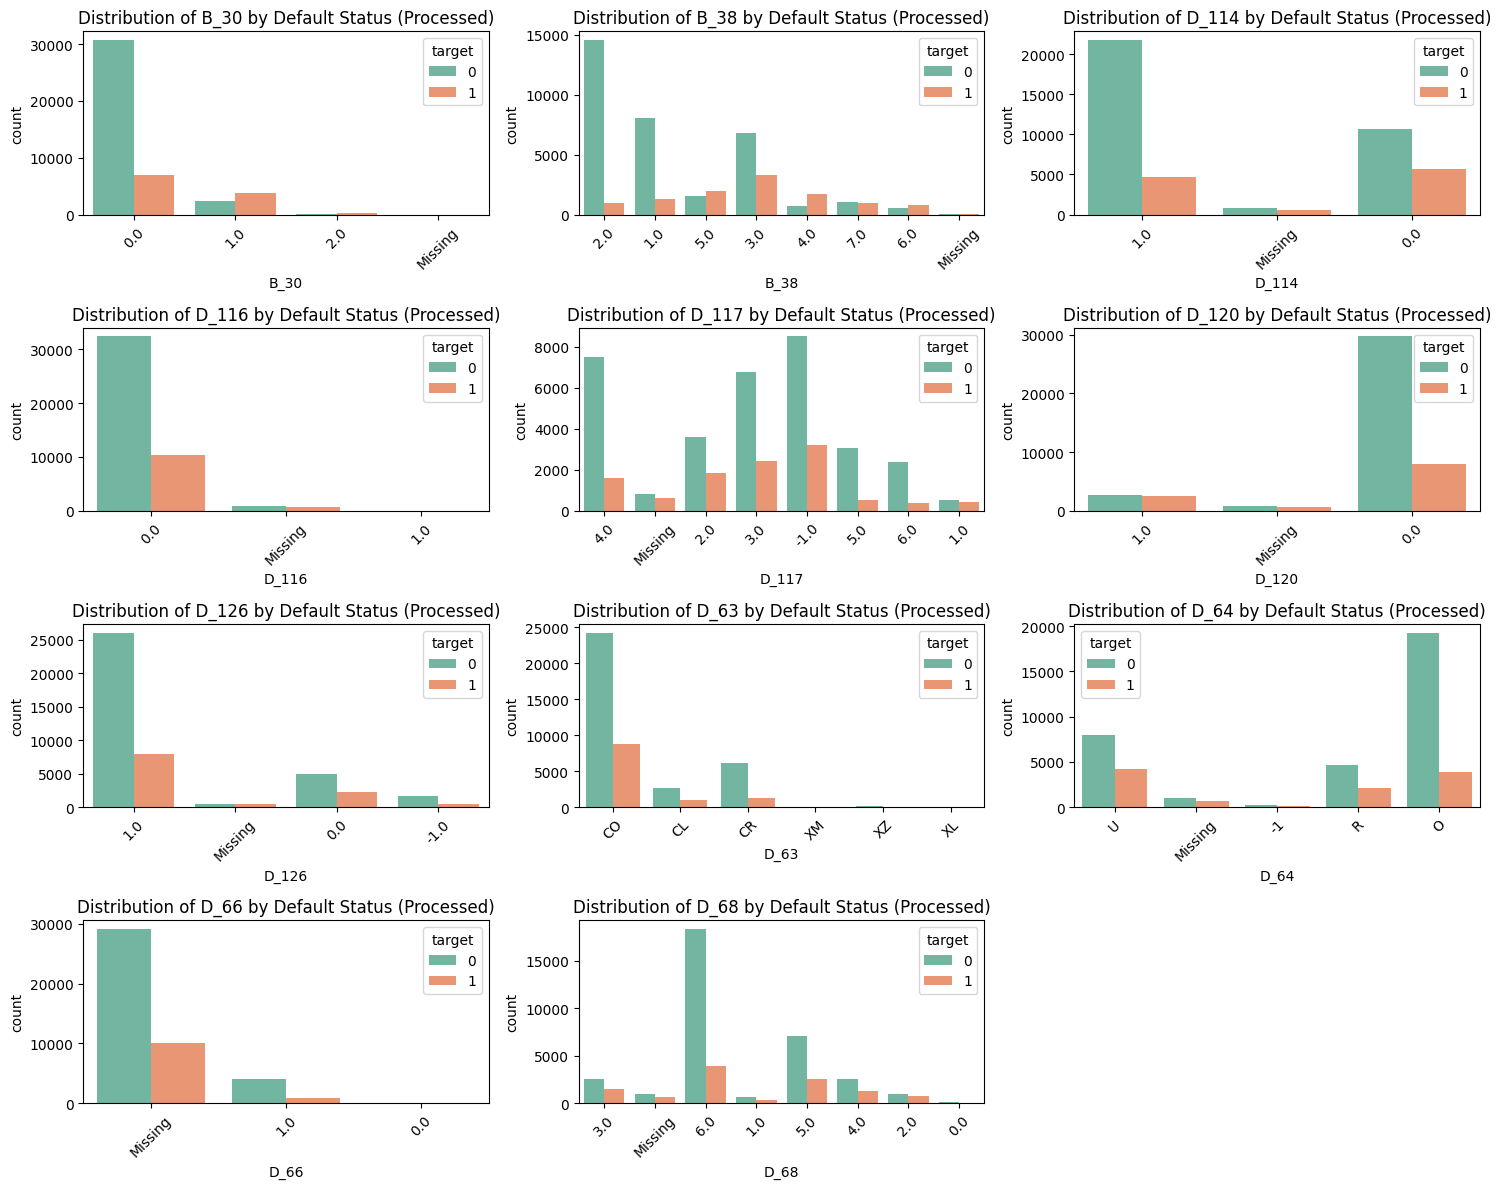

<Figure size 640x480 with 0 Axes>

In [11]:
#have to handle the missing values here, redo plots to compare differences
# Redo the visualization with better handling of the -999 values
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features):
    if feature in sampled_data_processed.columns:
        plt.subplot(4, 3, i+1)

        # Create a temporary copy with the -999 values labeled as "Missing"
        temp_data = sampled_data_processed.copy()
        if (temp_data[feature] == -999).any():
            temp_data[feature] = temp_data[feature].replace(-999, 'Missing')

        # Use the processed data with better labeling
        sns.countplot(x=feature, hue='target', data=temp_data, palette='Set2')
        plt.title(f'Distribution of {feature} by Default Status (Processed)')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
plt.savefig('categorical.png', dpi=300, bbox_inches='tight')

Comparing the two visualizations reveals that many categorical features had missing values that our initial analysis overlooked. The processed plots now show "Missing" categories across several features, indicating where data was absent. Most notably, features like B_30, D_114, and D_120 show different default rate patterns for missing values compared to existing categories – in some cases, missing values have higher default rates, suggesting that missingness itself might be predictive of credit risk.

The key insight is that missing data in credit applications often carries valuable signal rather than just being random noise. Customers who don't provide certain information may have different risk profiles, which could significantly improve our predictive models.

The challenge we faced was that visualization tools can sometimes obscure or misrepresent missing data patterns, making it difficult to detect important relationships. Our lesson is that handling missing values should be done early in the analysis process, with careful attention to how missingness might relate to the target variable. A robust missing value strategy reveals patterns that would otherwise remain hidden, potentially transforming seemingly incomplete data into a predictive advantage.

Grouping features by type...
Delinquency: 73 features
Spend: 22 features
Payment: 3 features
Balance: 35 features
Risk: 27 features


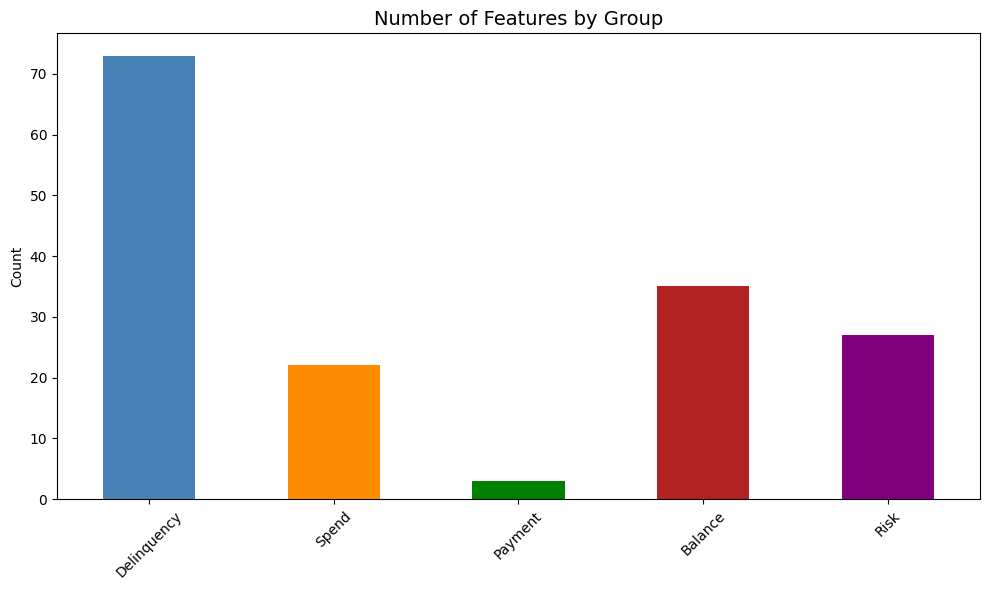


Verifying numerical features...
Delinquency: 73 numeric features
Spend: 21 numeric features
Payment: 3 numeric features
Balance: 35 numeric features
Risk: 27 numeric features

Calculating correlations with target...

Top 15 features by absolute correlation with target:
P_2: -0.6047
D_48: 0.5321
B_9: 0.4922
D_61: 0.4873
B_18: -0.4850
B_2: -0.4817
D_75: 0.4622
D_44: 0.4621
D_58: 0.4518
B_33: -0.4514
D_55: 0.4495
B_7: 0.4362
B_3: 0.4300
B_23: 0.4288
D_74: 0.4266


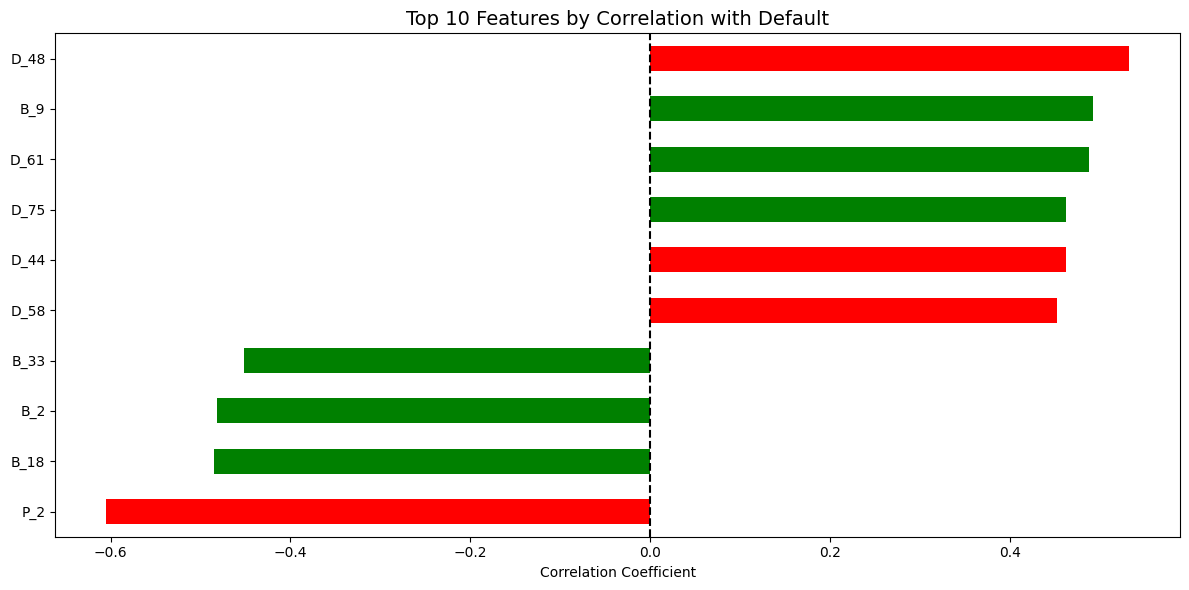

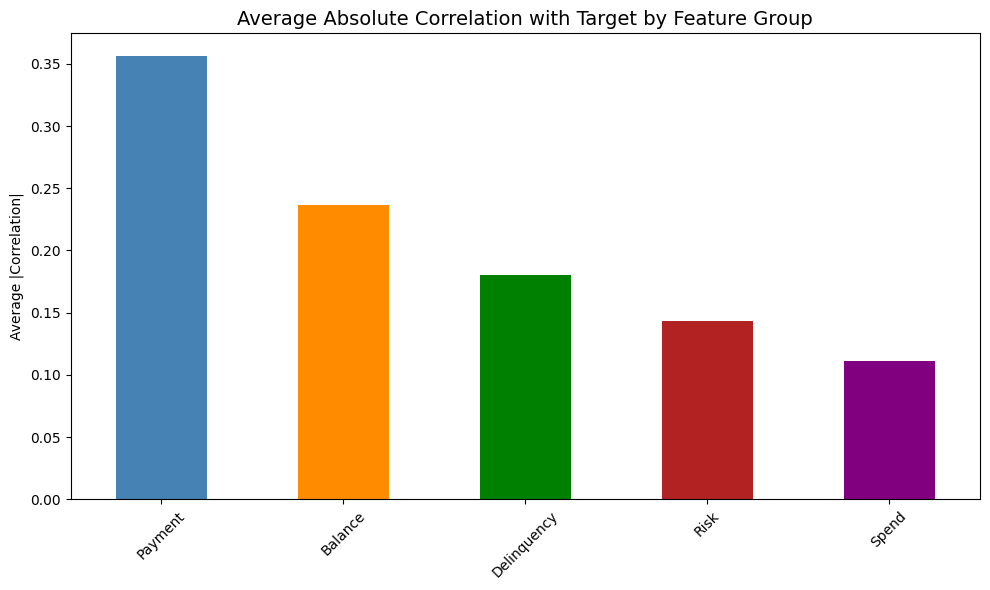


--- Analyzing Delinquency Features ---
Top features by correlation: ['D_48', 'D_61', 'D_75']


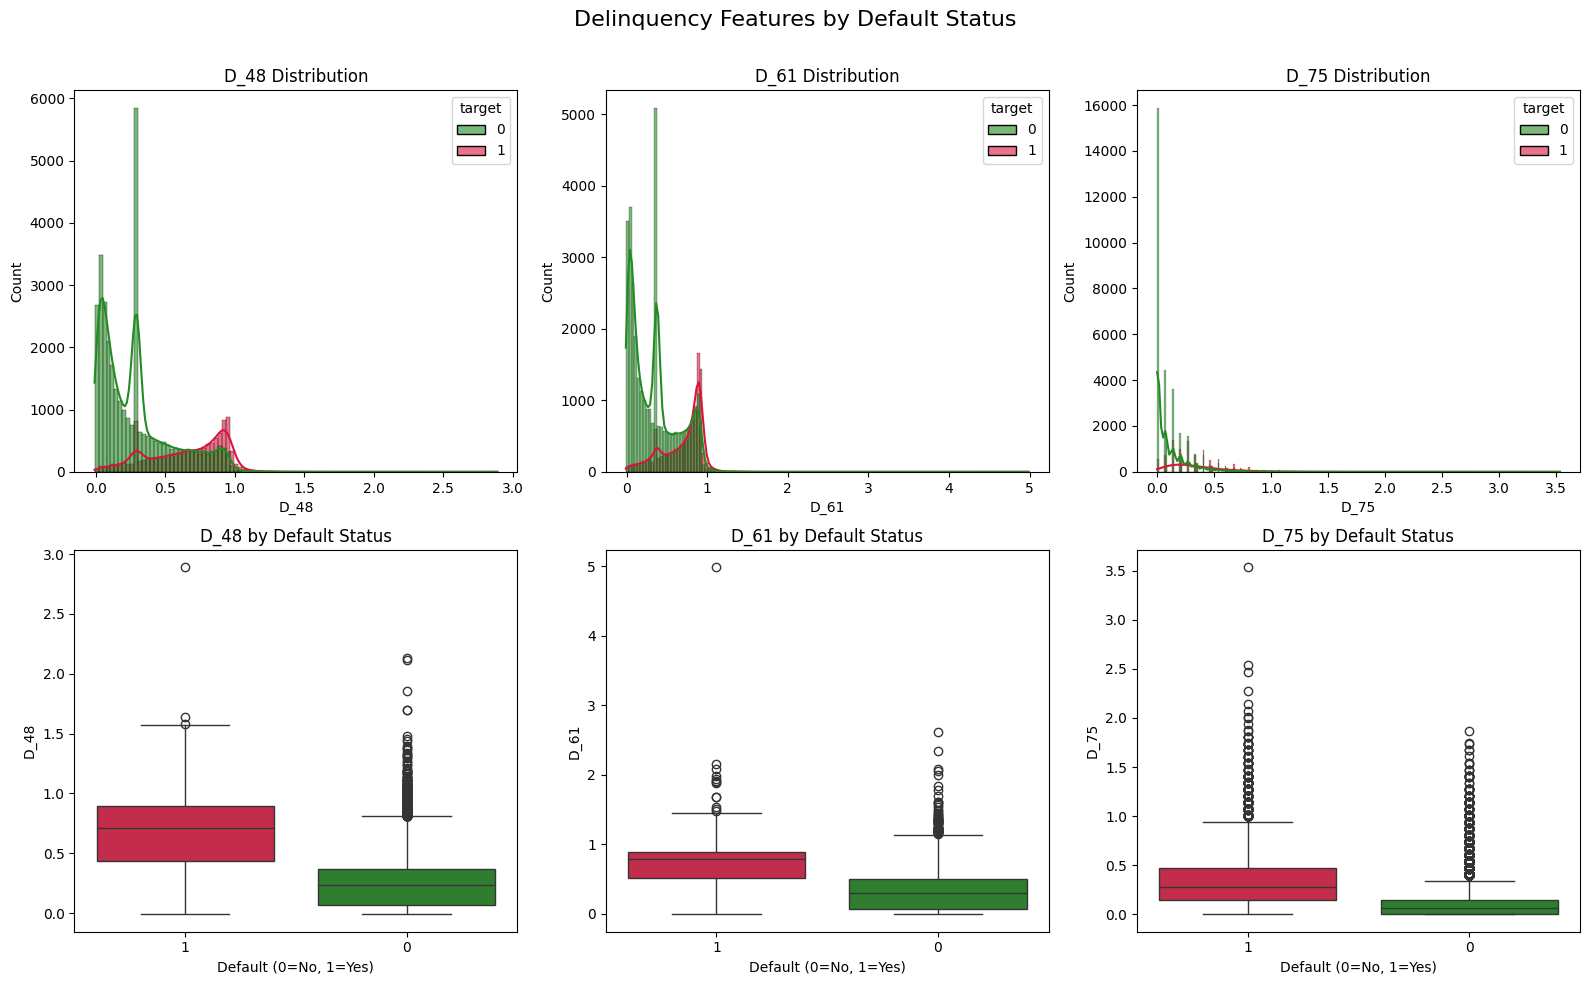


Summary statistics:

D_48:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.277968      0.654668
std        0.254630      0.272772
min       -0.009603     -0.009043
25%        0.070157      0.437825
50%        0.233551      0.710559
75%        0.366585      0.892400
max        2.131454      2.889833
Correlation with target: 0.5321

D_61:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.333722      0.695826
std        0.287434      0.259014
min       -0.009249     -0.008967
25%        0.074046      0.519041
50%        0.291688      0.792435
75%        0.503344      0.893840
max        2.609996      4.987173
Correlation with target: 0.4873

D_75:
        Non-Default       Default
count  3.322700e+04  11024.000000
mean   1.119946e-01      0.350289
std    1.662068e-01      0.271519
min    1.357813e-08      0.000017
25%    5.292551e-03      0.141164
50%    6.788589e-02      0.274282
75%    1.415014e-01      0.471555
max    1.8

<ipython-input-12-5d12c14ed8ac>:156: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


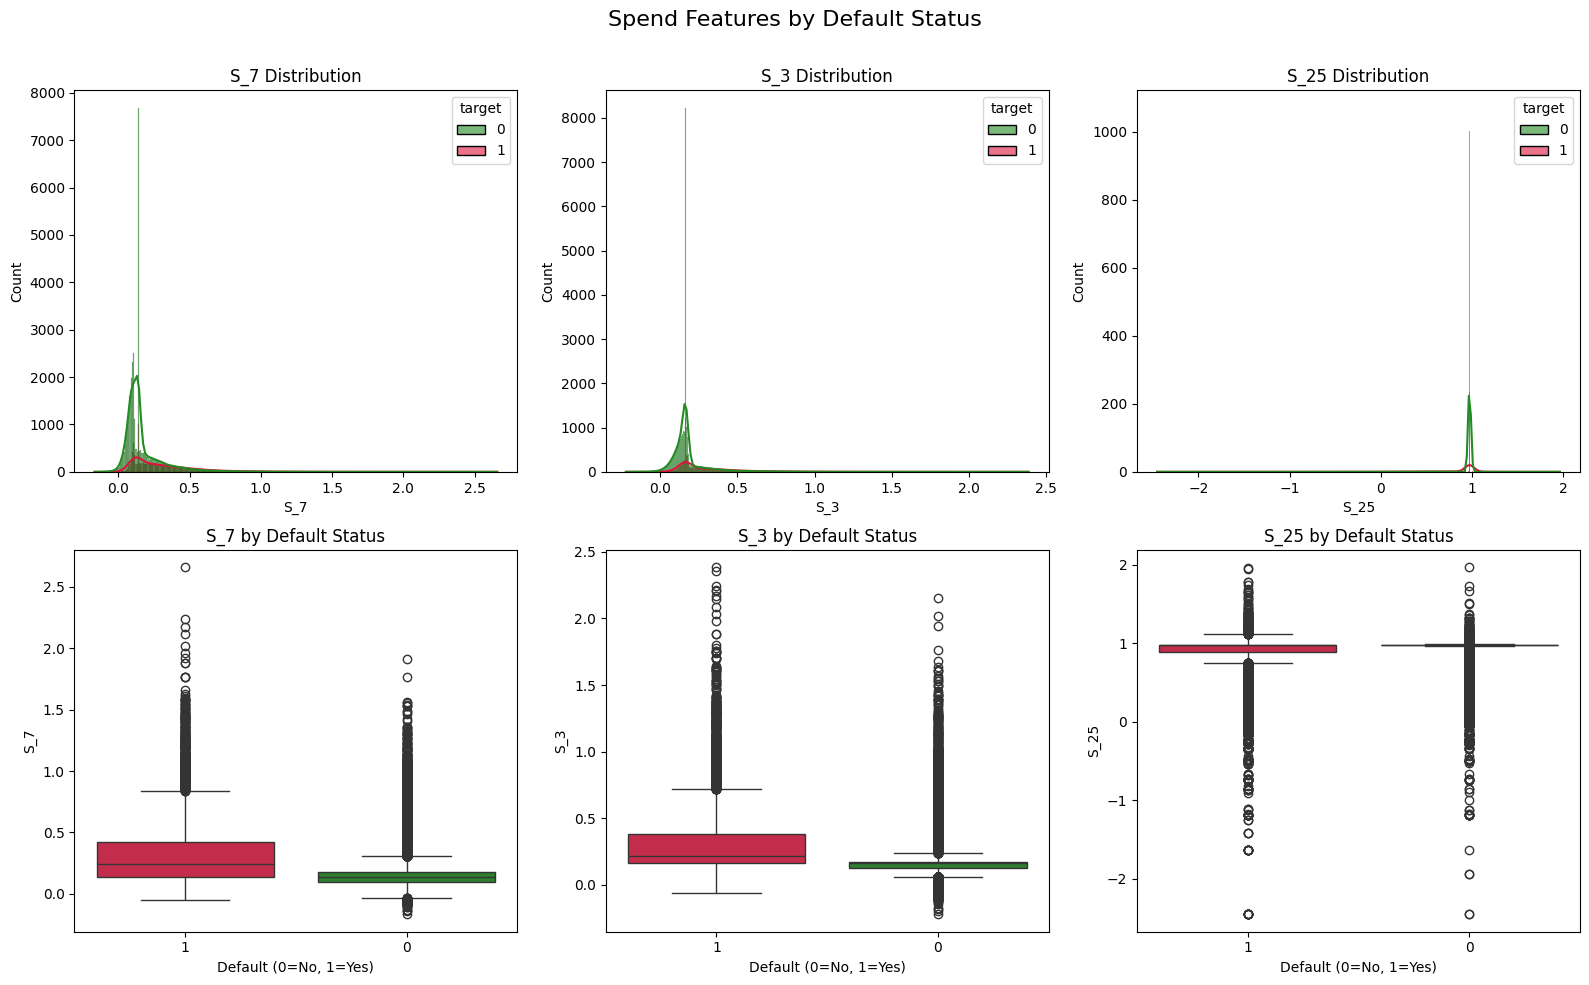


Summary statistics:

S_7:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.170233      0.315475
std        0.147475      0.247361
min       -0.166510     -0.051385
25%        0.093646      0.138475
50%        0.138475      0.243069
75%        0.180122      0.418961
max        1.911699      2.659143
Correlation with target: 0.3333

S_3:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.182029      0.310844
std        0.135049      0.238587
min       -0.222558     -0.065024
25%        0.126824      0.163608
50%        0.163608      0.213617
75%        0.172415      0.384787
max        2.150439      2.384804
Correlation with target: 0.3165

S_25:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.954848      0.836416
std        0.126667      0.324771
min       -2.450739     -2.452456
25%        0.971372      0.884726
50%        0.973973      0.972502
75%        0.976584      0.976153
max        1

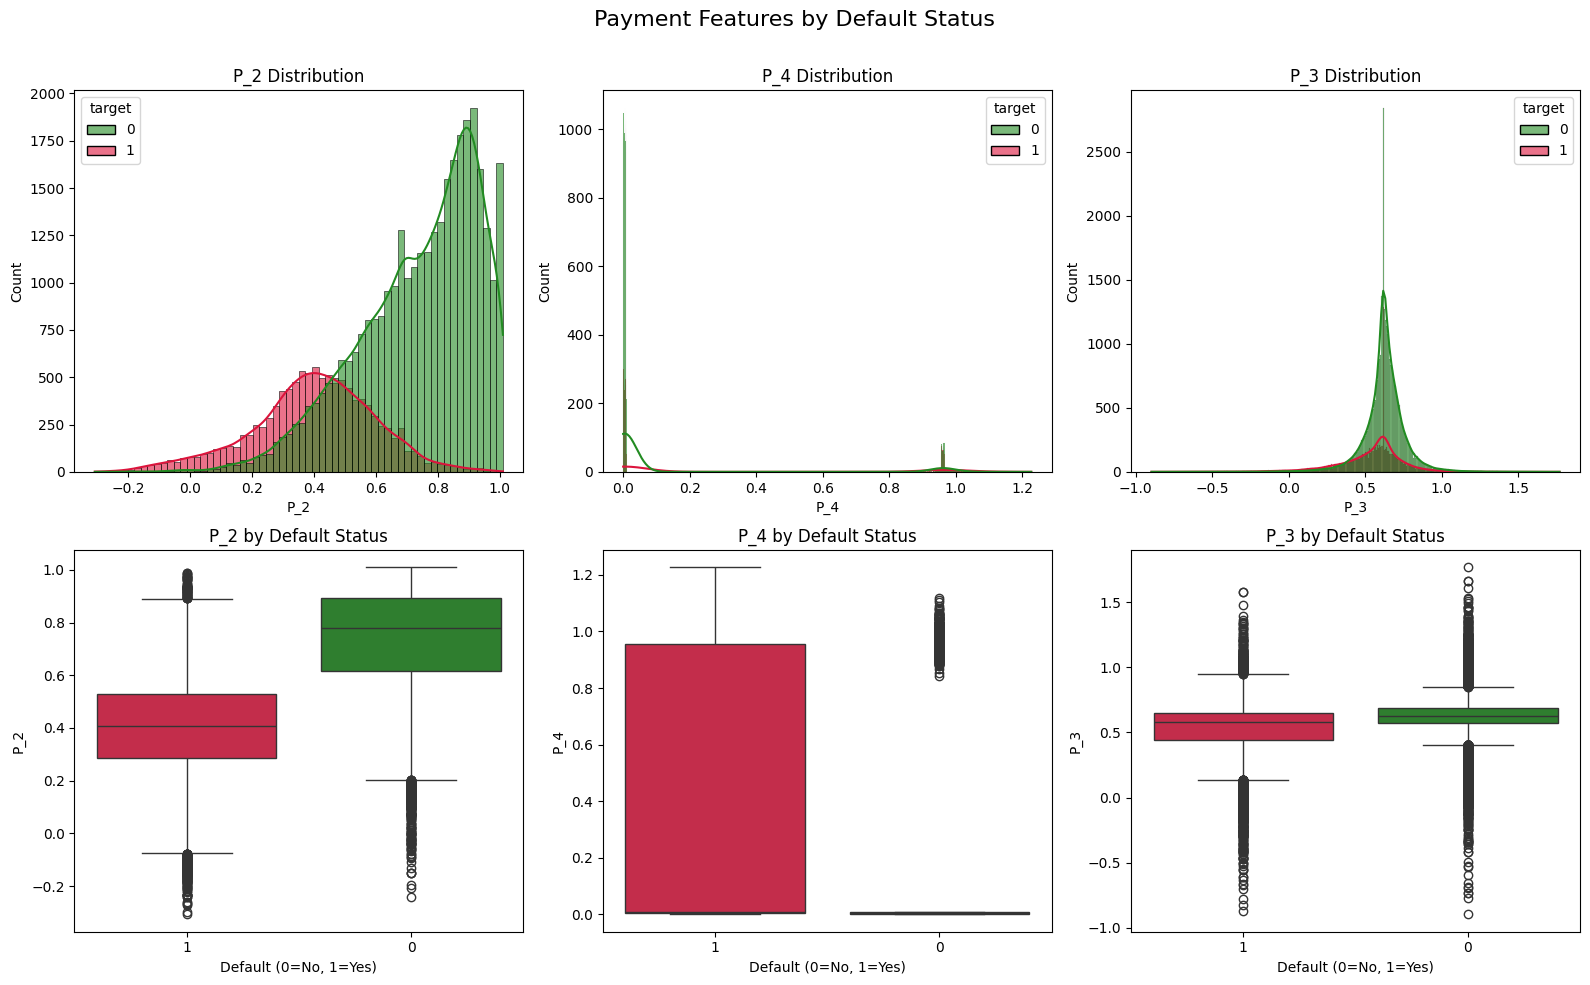


Summary statistics:

P_2:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.740030      0.398580
std        0.193139      0.198538
min       -0.241440     -0.307321
25%        0.617126      0.286817
50%        0.780474      0.407607
75%        0.893224      0.529203
max        1.009999      0.989117
Correlation with target: -0.6047

P_4:
        Non-Default       Default
count  3.322700e+04  1.102400e+04
mean   9.762563e-02  2.821790e-01
std    2.832145e-01  4.372099e-01
min    5.149588e-07  1.597919e-07
25%    2.790427e-03  3.430611e-03
50%    5.553105e-03  7.032055e-03
75%    8.289460e-03  9.568341e-01
max    1.118946e+00  1.226803e+00
Correlation with target: 0.2362

P_3:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.623454      0.535319
std        0.138668      0.217257
min       -0.897213     -0.873704
25%        0.572871      0.442595
50%        0.622593      0.581749
75%        0.684698      0.646079
max        1

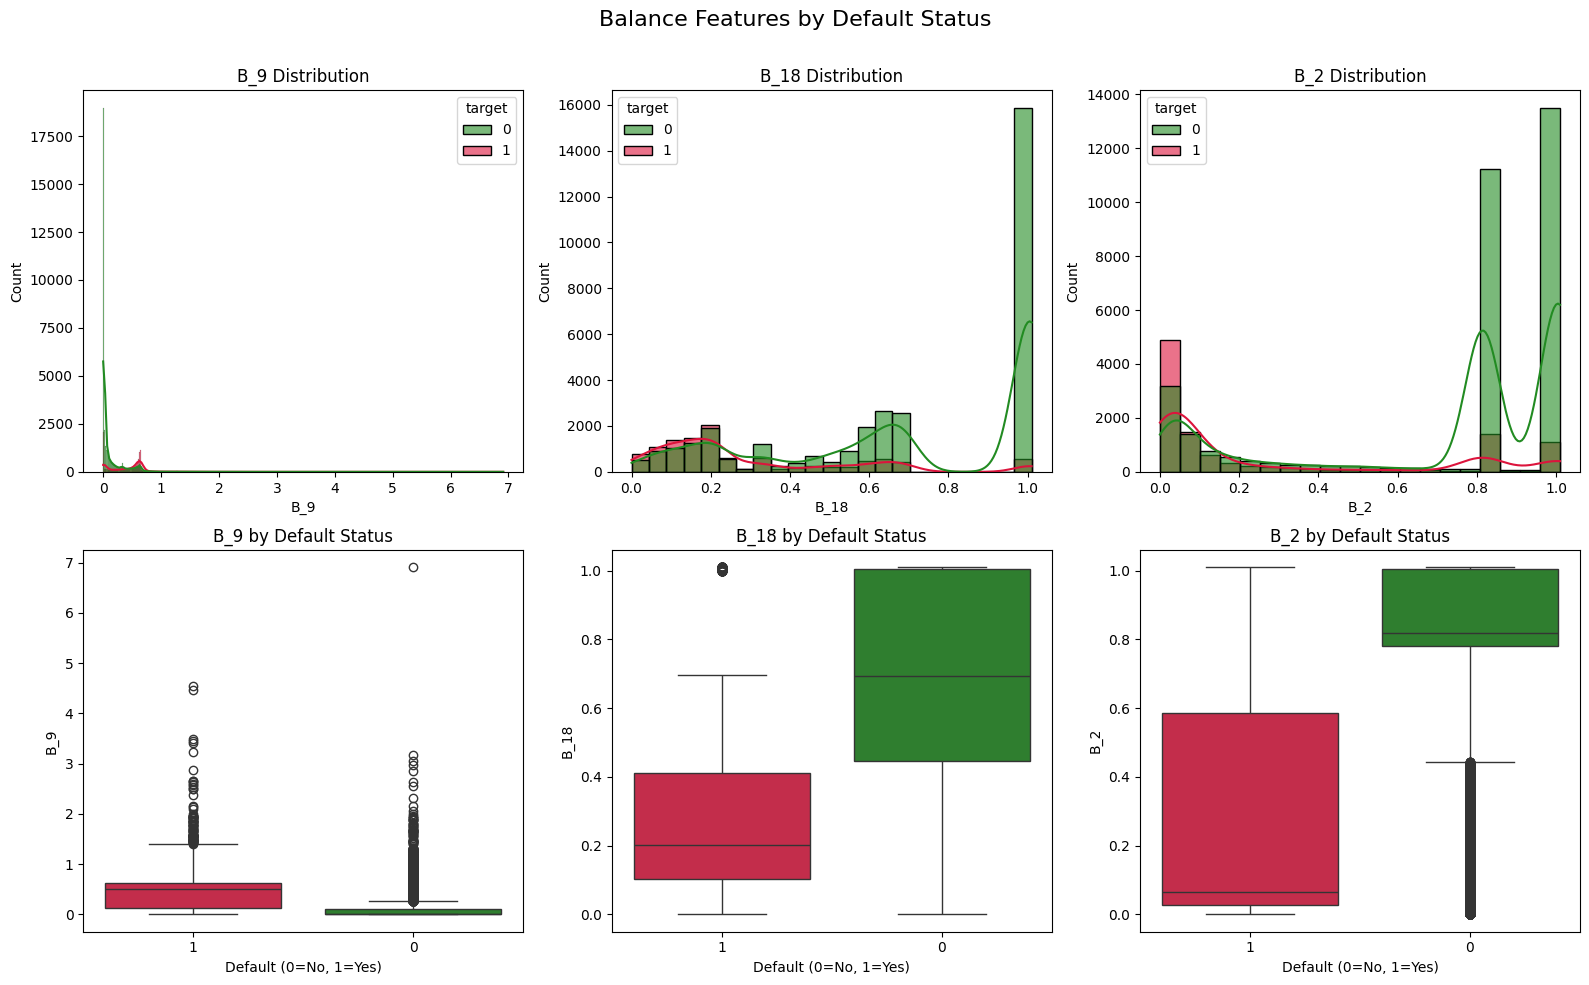


Summary statistics:

B_9:
        Non-Default       Default
count  3.322700e+04  1.102400e+04
mean   1.117765e-01  4.257496e-01
std    2.084871e-01  3.171439e-01
min    2.137791e-07  5.584668e-07
25%    4.830378e-03  1.226163e-01
50%    9.496842e-03  5.119837e-01
75%    1.103863e-01  6.331196e-01
max    6.910414e+00  4.547181e+00
Correlation with target: 0.4922

B_18:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.696705      0.286350
std        0.338761      0.255435
min        0.000021      0.000009
25%        0.446753      0.101889
50%        0.694783      0.201317
75%        1.004776      0.411394
max        1.010000      1.009993
Correlation with target: -0.4850

B_2:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.730109      0.282293
std        0.348744      0.363127
min        0.000044      0.000013
25%        0.779540      0.027443
50%        0.817361      0.064646
75%        1.003739      0.587132
max        

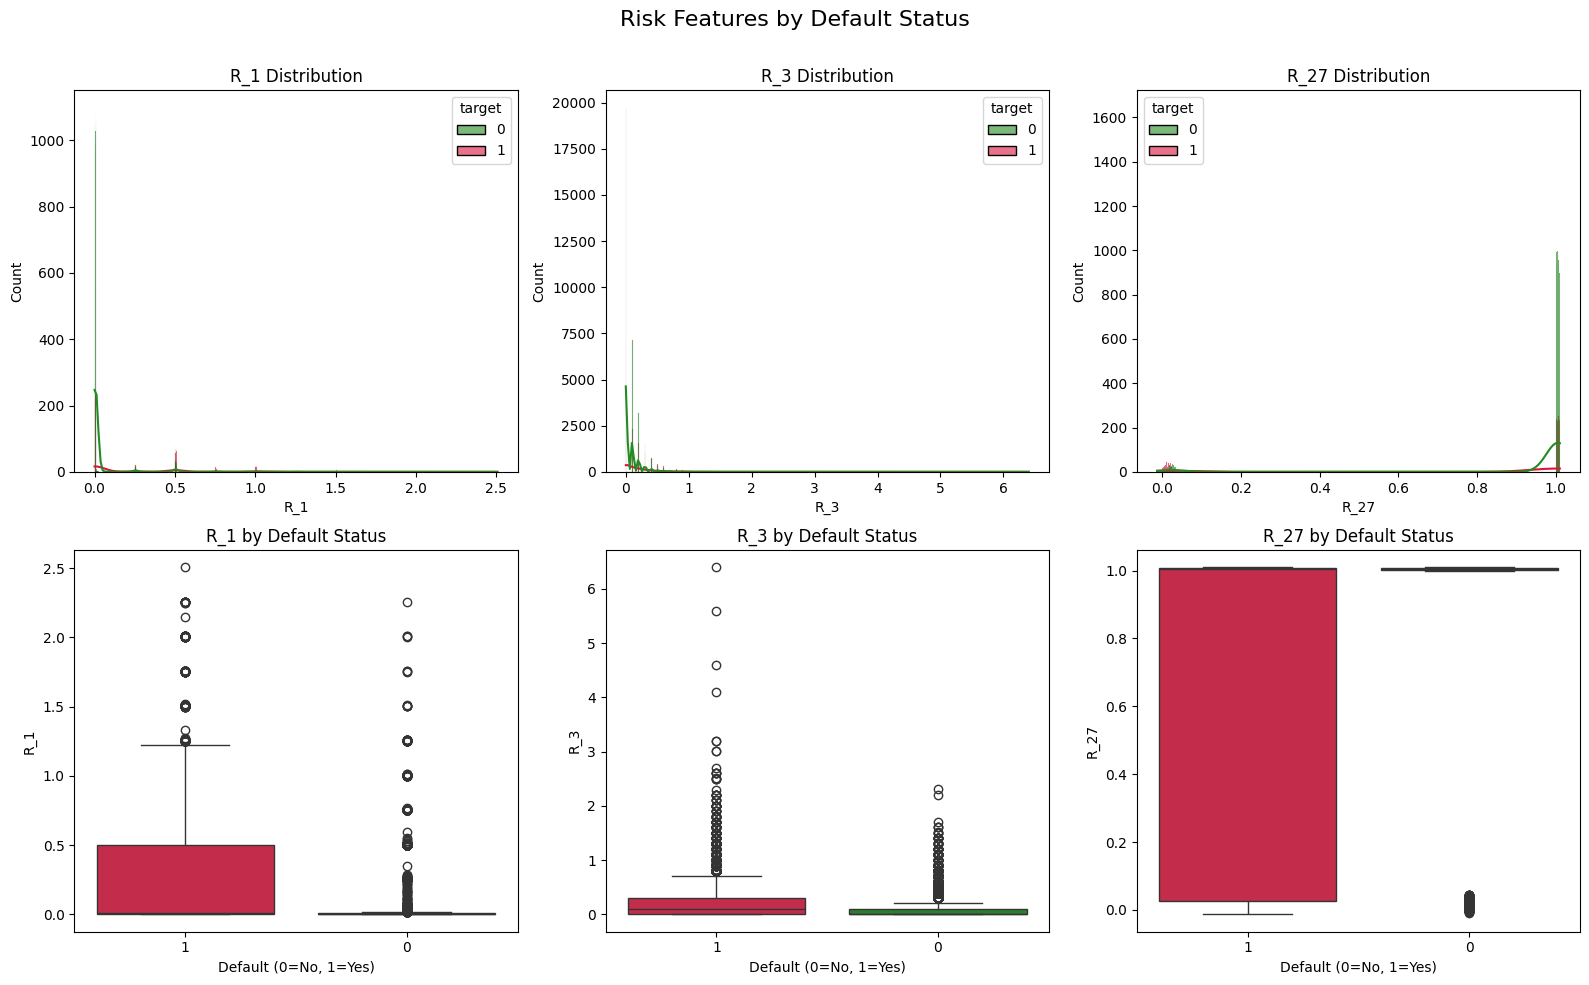


Summary statistics:

R_1:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.031323      0.229376
std        0.124168      0.370053
min        0.000001      0.000001
25%        0.002691      0.003829
50%        0.005418      0.007754
75%        0.008040      0.502374
max        2.252893      2.505780
Correlation with target: 0.3720

R_3:
        Non-Default       Default
count  3.322700e+04  1.102400e+04
mean   8.678681e-02  2.252526e-01
std    1.433923e-01  3.124226e-01
min    1.219408e-07  1.570629e-07
25%    4.184774e-03  7.203247e-03
50%    8.412042e-03  1.075982e-01
75%    1.073621e-01  3.059881e-01
max    2.304955e+00  6.400770e+00
Correlation with target: 0.2877

R_27:
        Non-Default       Default
count  33227.000000  11024.000000
mean       0.944207      0.744931
std        0.236558      0.436343
min       -0.009153     -0.013277
25%        1.002043      0.025520
50%        1.004503      1.003399
75%        1.007256      1.006498
max        1

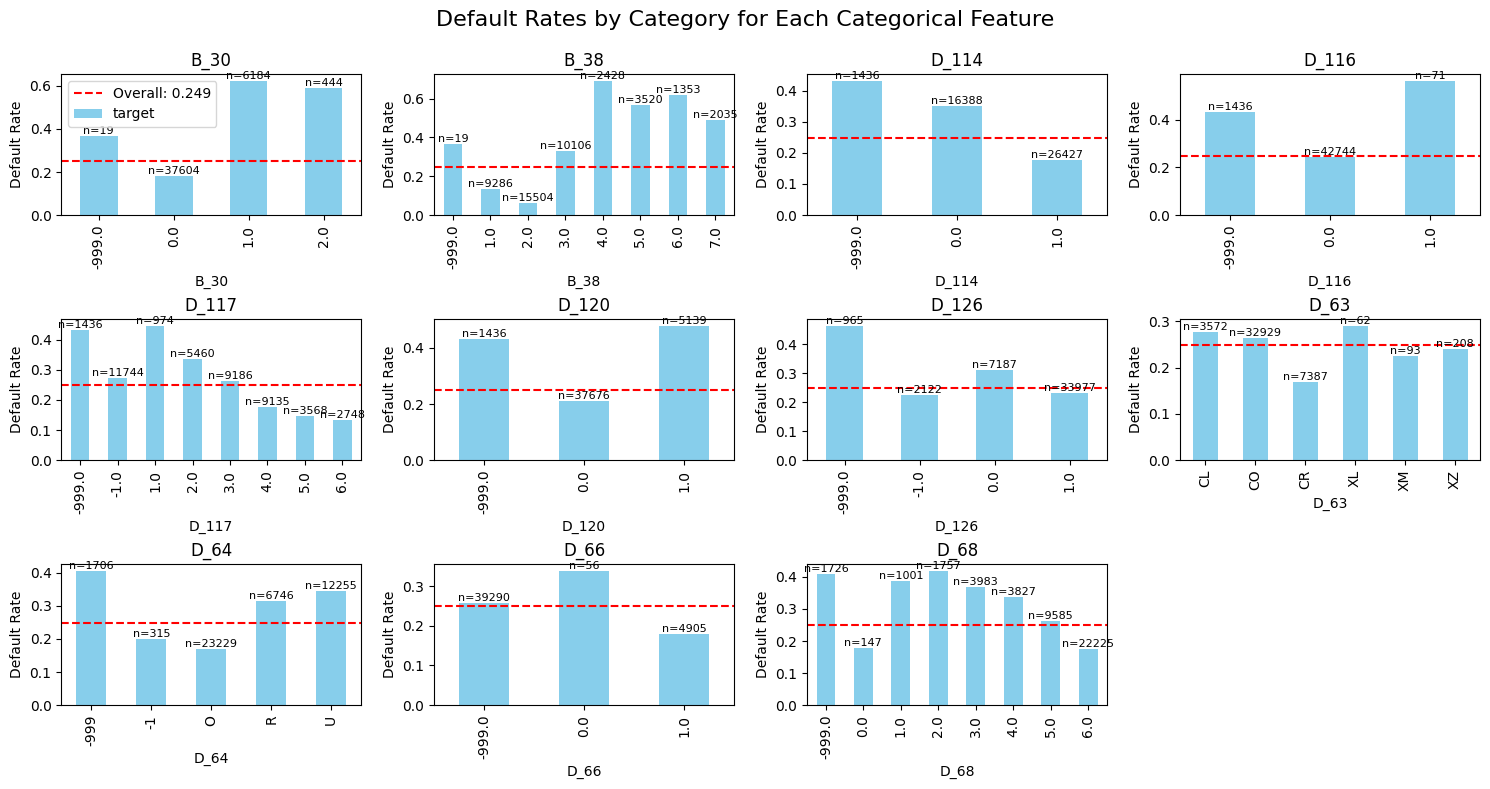

In [12]:
# Explore Numerical Features - Fixed Version

# Group features by their types
print("Grouping features by type...")
all_columns = [col for col in sampled_data_processed.columns if col not in ['customer_ID', 'target']]

# Define categorical features list
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Group remaining features by their prefix
feature_groups = {
    'Delinquency': [col for col in all_columns if col.startswith('D_') and col not in categorical_features],
    'Spend': [col for col in all_columns if col.startswith('S_')],
    'Payment': [col for col in all_columns if col.startswith('P_')],
    'Balance': [col for col in all_columns if col.startswith('B_') and col not in categorical_features],
    'Risk': [col for col in all_columns if col.startswith('R_')]
}

# Print count of features in each group
for group, features in feature_groups.items():
    print(f"{group}: {len(features)} features")

# Create a bar chart showing feature count by group
plt.figure(figsize=(10, 6))
feature_counts = {group: len(features) for group, features in feature_groups.items()}
pd.Series(feature_counts).plot(kind='bar', color=['steelblue', 'darkorange', 'green', 'firebrick', 'purple'])
plt.title('Number of Features by Group', fontsize=14)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ensure we're working with truly numerical features
print("\nVerifying numerical features...")
numerical_groups = {}
all_numeric_features = []

for group, features in feature_groups.items():
    numerical_features = []
    for feature in features:
        # Check if the feature is actually numeric
        if pd.api.types.is_numeric_dtype(sampled_data_processed[feature]):
            numerical_features.append(feature)
            all_numeric_features.append(feature)
        else:
            print(f"Warning: {feature} is not numeric and will be excluded")

    numerical_groups[group] = numerical_features
    print(f"{group}: {len(numerical_features)} numeric features")

# Calculate correlation with target for all numerical features
print("\nCalculating correlations with target...")
corr_with_target = {}
for feature in all_numeric_features:
    corr = sampled_data_processed[[feature, 'target']].corr().iloc[0, 1]
    corr_with_target[feature] = corr

# Sort by absolute correlation
abs_corr_with_target = {feat: abs(corr) for feat, corr in corr_with_target.items()}
sorted_features = sorted(abs_corr_with_target.items(), key=lambda x: x[1], reverse=True)

# Display top 15 most correlated features
print("\nTop 15 features by absolute correlation with target:")
for feature, abs_corr in sorted_features[:15]:
    actual_corr = corr_with_target[feature]
    print(f"{feature}: {actual_corr:.4f}")

# Visualize top 10 correlations
plt.figure(figsize=(12, 6))
top_features = dict(sorted_features[:10])
top_corrs = {feat: corr_with_target[feat] for feat in top_features}
colors = ['green' if c > 0 else 'red' for c in top_corrs.values()]
pd.Series(top_corrs).sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Features by Correlation with Default', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Calculate average absolute correlation by feature group
group_avg_corr = {}
for group, features in numerical_groups.items():
    if features:
        group_corrs = [abs_corr_with_target[feat] for feat in features]
        group_avg_corr[group] = sum(group_corrs) / len(group_corrs)
    else:
        group_avg_corr[group] = 0

# Plot average correlation by group
plt.figure(figsize=(10, 6))
pd.Series(group_avg_corr).sort_values(ascending=False).plot(kind='bar',
                                                           color=['steelblue', 'darkorange', 'green', 'firebrick', 'purple'])
plt.title('Average Absolute Correlation with Target by Feature Group', fontsize=14)
plt.ylabel('Average |Correlation|')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Now analyze each feature group in detail
for group_name, features in numerical_groups.items():
    if not features:  # Skip if group has no features
        print(f"\nNo numeric features in {group_name} group")
        continue

    print(f"\n--- Analyzing {group_name} Features ---")

    # Get correlation with target for features in this group
    group_corrs = {feat: corr_with_target[feat] for feat in features}
    # Sort by absolute correlation
    sorted_group_features = sorted(group_corrs.items(), key=lambda x: abs(x[1]), reverse=True)

    # Select top 3 features by correlation
    selected_features = [feat for feat, corr in sorted_group_features[:3]]
    print(f"Top features by correlation: {selected_features}")

    # Distribution plots
    plt.figure(figsize=(16, 10))

    # First row: Histograms
    for i, feature in enumerate(selected_features):
        plt.subplot(2, len(selected_features), i+1)

        sns.histplot(
            data=sampled_data_processed,
            x=feature,
            hue='target',
            palette={0: 'forestgreen', 1: 'crimson'},
            alpha=0.6,
            kde=True
        )

        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Count')

    # Second row: Boxplots - FIXED to handle target types correctly
    for i, feature in enumerate(selected_features):
        plt.subplot(2, len(selected_features), i+1+len(selected_features))

        # Convert target to string to avoid the palette issue
        temp_data = sampled_data_processed.copy()
        temp_data['target_str'] = temp_data['target'].astype(str)

        sns.boxplot(
            x='target_str',
            y=feature,
            data=temp_data,
            palette={'0': 'forestgreen', '1': 'crimson'}
        )

        plt.title(f'{feature} by Default Status')
        plt.xlabel('Default (0=No, 1=Yes)')
        plt.ylabel(feature)

    plt.suptitle(f'{group_name} Features by Default Status', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Summary statistics table
    print("\nSummary statistics:")
    for feature in selected_features:
        default_stats = sampled_data_processed[sampled_data_processed['target'] == 1][feature].describe()
        non_default_stats = sampled_data_processed[sampled_data_processed['target'] == 0][feature].describe()

        stats_comparison = pd.DataFrame({
            'Non-Default': non_default_stats,
            'Default': default_stats
        })

        print(f"\n{feature}:")
        print(stats_comparison)

        # Calculate correlation with target
        corr = corr_with_target[feature]
        print(f"Correlation with target: {corr:.4f}")

# Add code to visualize categorical features together - more simplified
print("\nVisualizing categorical feature distributions...")

# Calculate default rates for each categorical feature
default_rates_by_feature = {}

for feature in categorical_features:
    # Calculate default rate for each category
    default_rate = sampled_data_processed.groupby(feature)['target'].mean()
    default_rates_by_feature[feature] = default_rate

# Create visualization of default rates
plt.figure(figsize=(15, 8))

overall_rate = sampled_data_processed['target'].mean()

for i, (feature, rates) in enumerate(default_rates_by_feature.items()):
    plt.subplot(3, 4, i+1)
    rates.plot(kind='bar', color='skyblue')
    plt.axhline(y=overall_rate, color='red', linestyle='--',
                label=f'Overall: {overall_rate:.3f}')
    plt.title(feature)
    plt.ylabel('Default Rate')
    if i == 0:
        plt.legend()

    # Add count annotations if there aren't too many categories
    if len(rates) <= 8:
        counts = sampled_data_processed[feature].value_counts()
        for j, v in enumerate(rates.index):
            count = counts.get(v, 0)
            plt.annotate(f'n={count}', xy=(j, rates[v]),
                         ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.suptitle('Default Rates by Category for Each Categorical Feature', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

Analyzing feature importance...

--- Correlation Analysis ---

Top 15 features by absolute correlation with default:
P_2: -0.6047 (negative correlation)
D_48: 0.5321 (positive correlation)
B_9: 0.4922 (positive correlation)
D_61: 0.4873 (positive correlation)
B_18: -0.4850 (negative correlation)
B_2: -0.4817 (negative correlation)
D_75: 0.4622 (positive correlation)
D_44: 0.4621 (positive correlation)
D_58: 0.4518 (positive correlation)
B_33: -0.4514 (negative correlation)
D_55: 0.4495 (positive correlation)
B_7: 0.4362 (positive correlation)
B_3: 0.4300 (positive correlation)
B_23: 0.4288 (positive correlation)
D_74: 0.4266 (positive correlation)


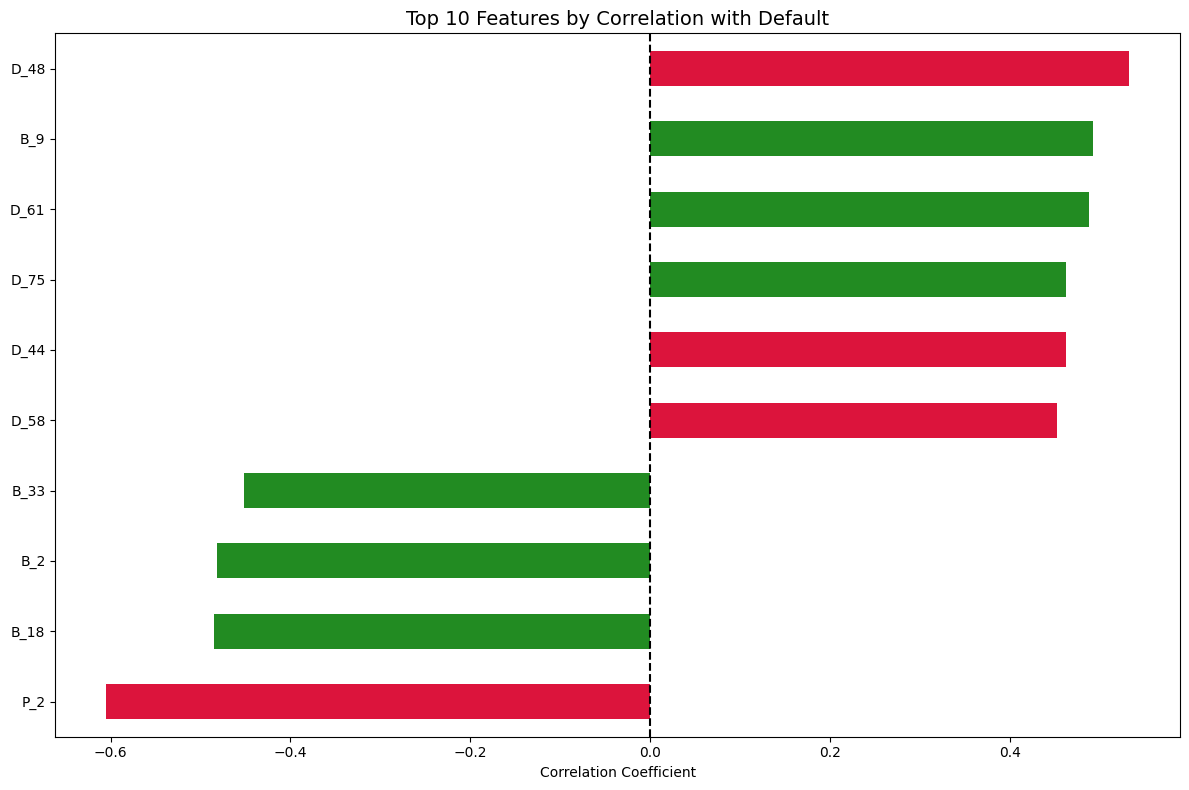


--- Mutual Information Analysis ---

Top 15 features by mutual information score:
P_2: 0.2082
D_48: 0.1483
D_61: 0.1371
D_75: 0.1362
D_44: 0.1348
B_9: 0.1331
B_18: 0.1327
B_23: 0.1268
B_6: 0.1267
B_7: 0.1266
B_10: 0.1237
D_62: 0.1206
B_2: 0.1191
B_3: 0.1189
B_1: 0.1182


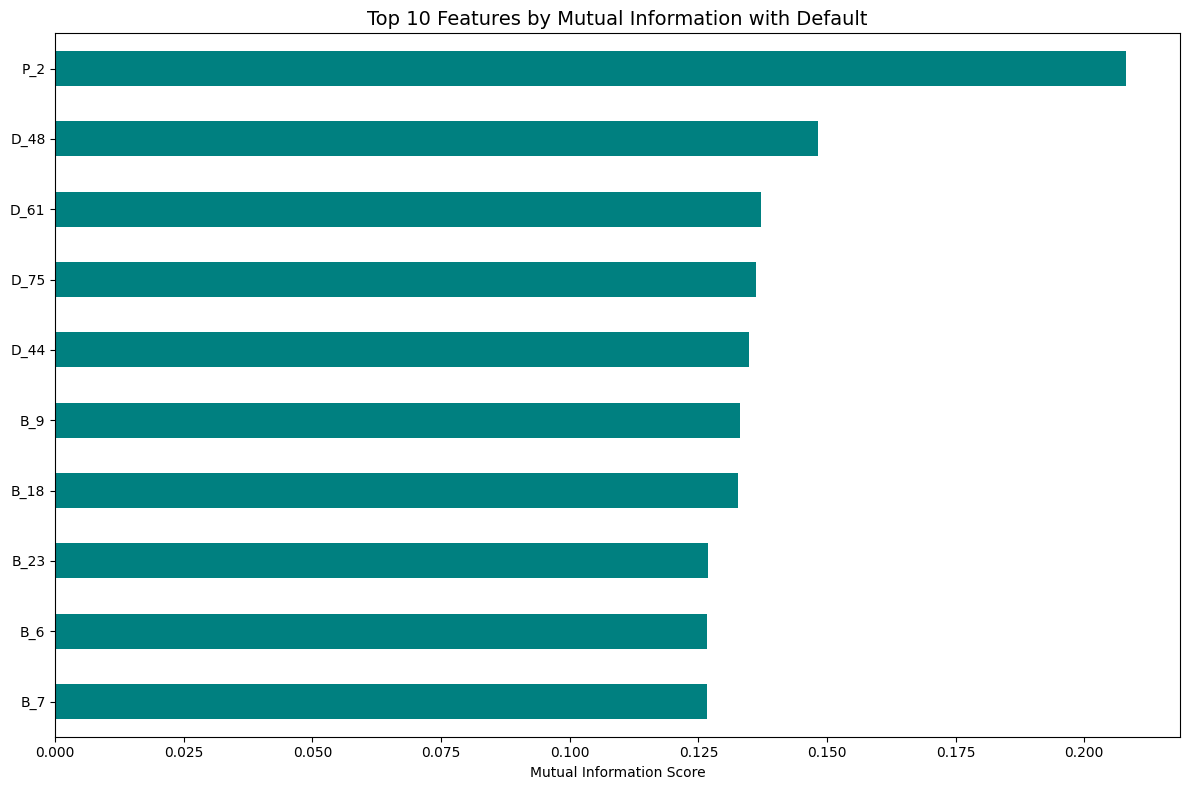


--- Feature Importance by Group ---


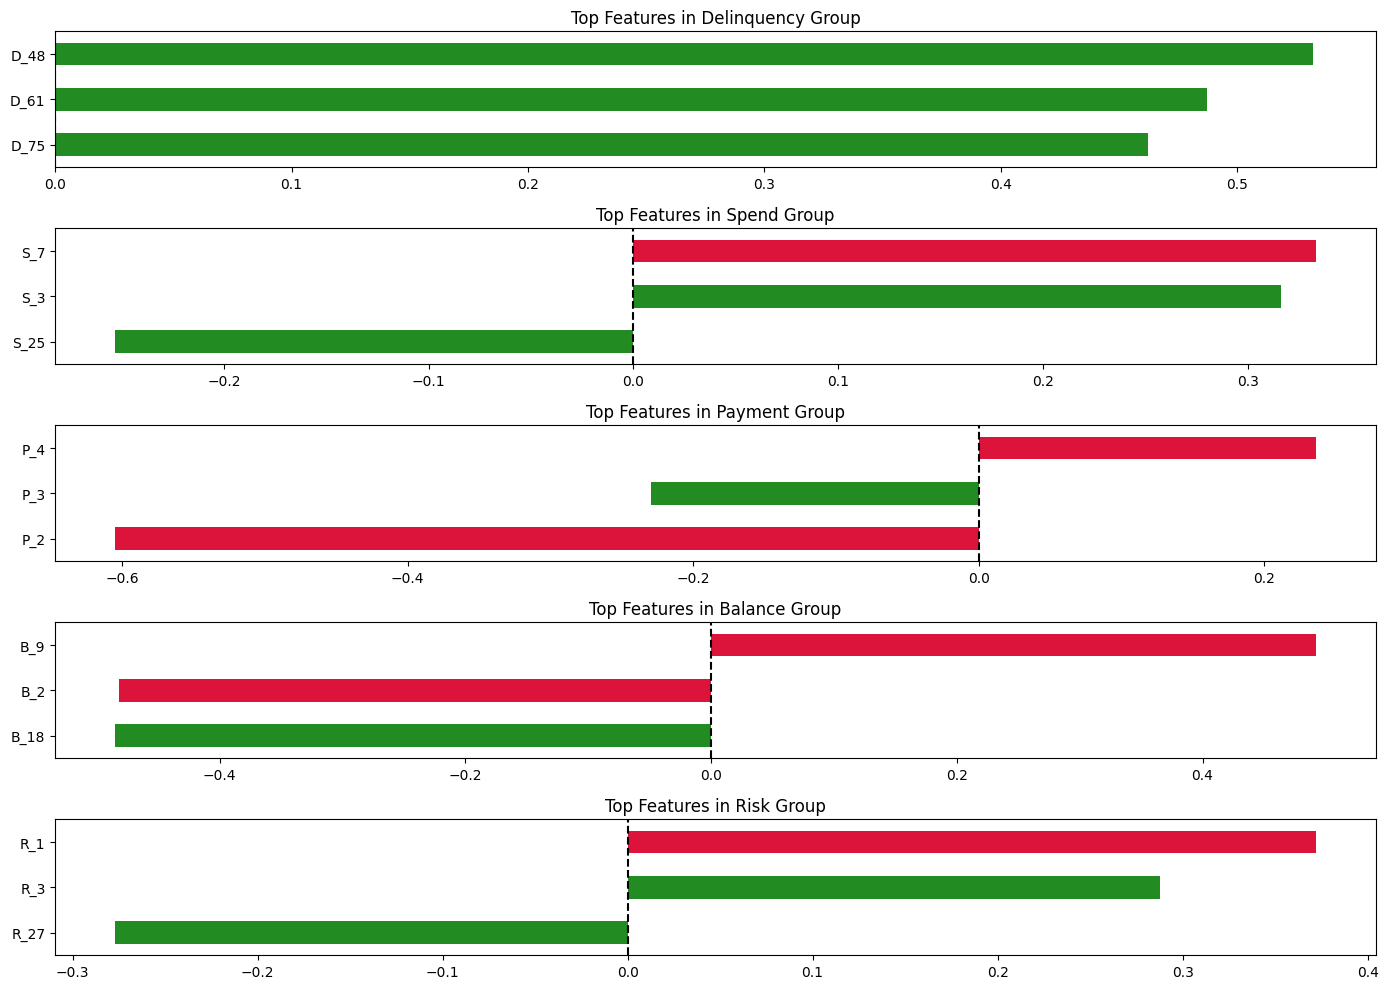


--- Summary of Feature Importance Analysis ---
Total features analyzed: 168
Features with |correlation| > 0.1: 107
Features with |correlation| > 0.2: 55

Most important feature from each group:
Delinquency: D_48 (correlation: 0.5321)
Spend: S_7 (correlation: 0.3333)
Payment: P_2 (correlation: -0.6047)
Balance: B_9 (correlation: 0.4922)
Risk: R_1 (correlation: 0.3720)


In [13]:
#  Find the Most Important Features

print("Analyzing feature importance...")

# 1. Calculate correlation with target for all numeric features
print("\n--- Correlation Analysis ---")

# Get all numeric features
numeric_columns = sampled_data_processed.select_dtypes(include=['number']).columns.tolist()
# Remove target from list if present
if 'target' in numeric_columns:
    numeric_columns.remove('target')
# Remove customer_ID from list if present
if 'customer_ID' in numeric_columns:
    numeric_columns.remove('customer_ID')

# Calculate correlation with target
correlations = sampled_data_processed[numeric_columns + ['target']].corr()['target'].drop('target')
abs_correlations = correlations.abs().sort_values(ascending=False)

# Display top features by absolute correlation
print("\nTop 15 features by absolute correlation with default:")
for feature, corr_value in abs_correlations.head(15).items():
    actual_corr = correlations[feature]
    direction = "positive" if actual_corr > 0 else "negative"
    print(f"{feature}: {actual_corr:.4f} ({direction} correlation)")

# 2. Visualize top correlations
plt.figure(figsize=(12, 8))
top_features = abs_correlations.head(10).index

# Plot positive and negative correlations with different colors
corr_values = correlations[top_features]
colors = ['crimson' if c < 0 else 'forestgreen' for c in corr_values]

corr_values.sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Features by Correlation with Default', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

# 3. Use mutual information to capture non-linear relationships
print("\n--- Mutual Information Analysis ---")
from sklearn.feature_selection import mutual_info_classif

# Function to calculate mutual information safely
def calculate_mutual_info(data, features, target_col):
    try:
        # Handle any remaining missing values to avoid errors
        X = data[features].fillna(data[features].median())
        y = data[target_col]

        # Calculate mutual information
        mi_scores = mutual_info_classif(X, y, random_state=42)

        # Create a Series with feature names as index
        return pd.Series(mi_scores, index=features).sort_values(ascending=False)
    except Exception as e:
        print(f"Error calculating mutual information: {e}")
        return pd.Series()

# Calculate mutual information for numerical features
mi_scores = calculate_mutual_info(sampled_data_processed, numeric_columns, 'target')

if not mi_scores.empty:
    # Display top features by mutual information
    print("\nTop 15 features by mutual information score:")
    for feature, mi_score in mi_scores.head(15).items():
        print(f"{feature}: {mi_score:.4f}")

    # Visualize top features by mutual information
    plt.figure(figsize=(12, 8))
    mi_scores.head(10).sort_values().plot(kind='barh', color='teal')
    plt.title('Top 10 Features by Mutual Information with Default', fontsize=14)
    plt.xlabel('Mutual Information Score')
    plt.tight_layout()
    plt.show()

# 4. Compare feature importance across feature groups
print("\n--- Feature Importance by Group ---")

# Organize feature importance by group
group_importance = {}
for group_name, features in feature_groups.items():
    # Filter to include only numeric features
    numeric_features = [f for f in features if f in numeric_columns]
    if numeric_features:
        # Get correlation scores for features in this group
        group_correlations = correlations[numeric_features].abs().sort_values(ascending=False)
        group_importance[group_name] = group_correlations

# Visualize top features from each group
plt.figure(figsize=(14, 10))
for i, (group, importances) in enumerate(group_importance.items()):
    if not importances.empty:
        # Take top 3 features from each group
        top_group_features = importances.head(3)

        plt.subplot(len(group_importance), 1, i+1)
        colors = ['crimson' if correlations[feat] < 0 else 'forestgreen' for feat in top_group_features.index]

        # Plot actual correlation values (not absolute)
        correlations[top_group_features.index].sort_values().plot(kind='barh', color=colors)
        plt.title(f'Top Features in {group} Group', fontsize=12)
        plt.axvline(x=0, color='k', linestyle='--')

plt.tight_layout()
plt.show()

# 5. Summarize key findings
print("\n--- Summary of Feature Importance Analysis ---")
print(f"Total features analyzed: {len(numeric_columns)}")
print(f"Features with |correlation| > 0.1: {sum(abs_correlations > 0.1)}")
print(f"Features with |correlation| > 0.2: {sum(abs_correlations > 0.2)}")

# Identify the most important feature from each group
print("\nMost important feature from each group:")
for group, importances in group_importance.items():
    if not importances.empty:
        top_feature = importances.index[0]
        corr_value = correlations[top_feature]
        print(f"{group}: {top_feature} (correlation: {corr_value:.4f})")

Analyzing relationships between top features...

Analyzing relationships among top 10 features:
['P_2', 'D_48', 'B_9', 'D_61', 'B_18', 'B_2', 'D_75', 'D_44', 'D_58', 'B_33']


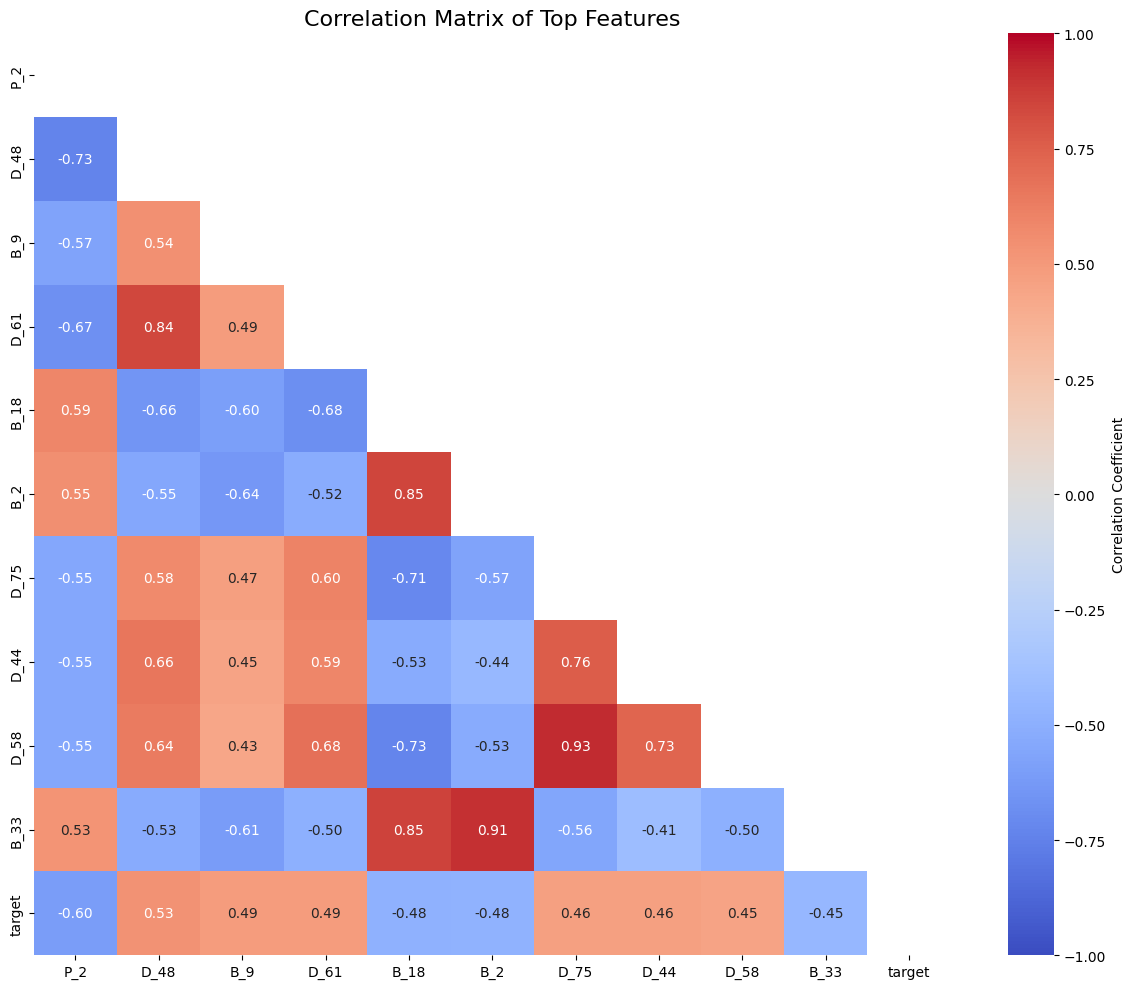


Checking for potential redundancy among top features:
Found 10 highly correlated feature pairs (|correlation| > 0.7):
D_75 & D_58: 0.9255 correlation
  • D_75 correlation with target: 0.4622
  • D_58 correlation with target: 0.4518
  • Recommendation: Consider keeping D_75 (stronger correlation with target)

B_2 & B_33: 0.9127 correlation
  • B_2 correlation with target: -0.4817
  • B_33 correlation with target: -0.4514
  • Recommendation: Consider keeping B_2 (stronger correlation with target)

B_18 & B_33: 0.8546 correlation
  • B_18 correlation with target: -0.4850
  • B_33 correlation with target: -0.4514
  • Recommendation: Consider keeping B_18 (stronger correlation with target)

B_18 & B_2: 0.8500 correlation
  • B_18 correlation with target: -0.4850
  • B_2 correlation with target: -0.4817
  • Recommendation: Consider keeping B_18 (stronger correlation with target)

D_48 & D_61: 0.8362 correlation
  • D_48 correlation with target: 0.5321
  • D_61 correlation with target: 0.487

<Figure size 1500x1200 with 0 Axes>

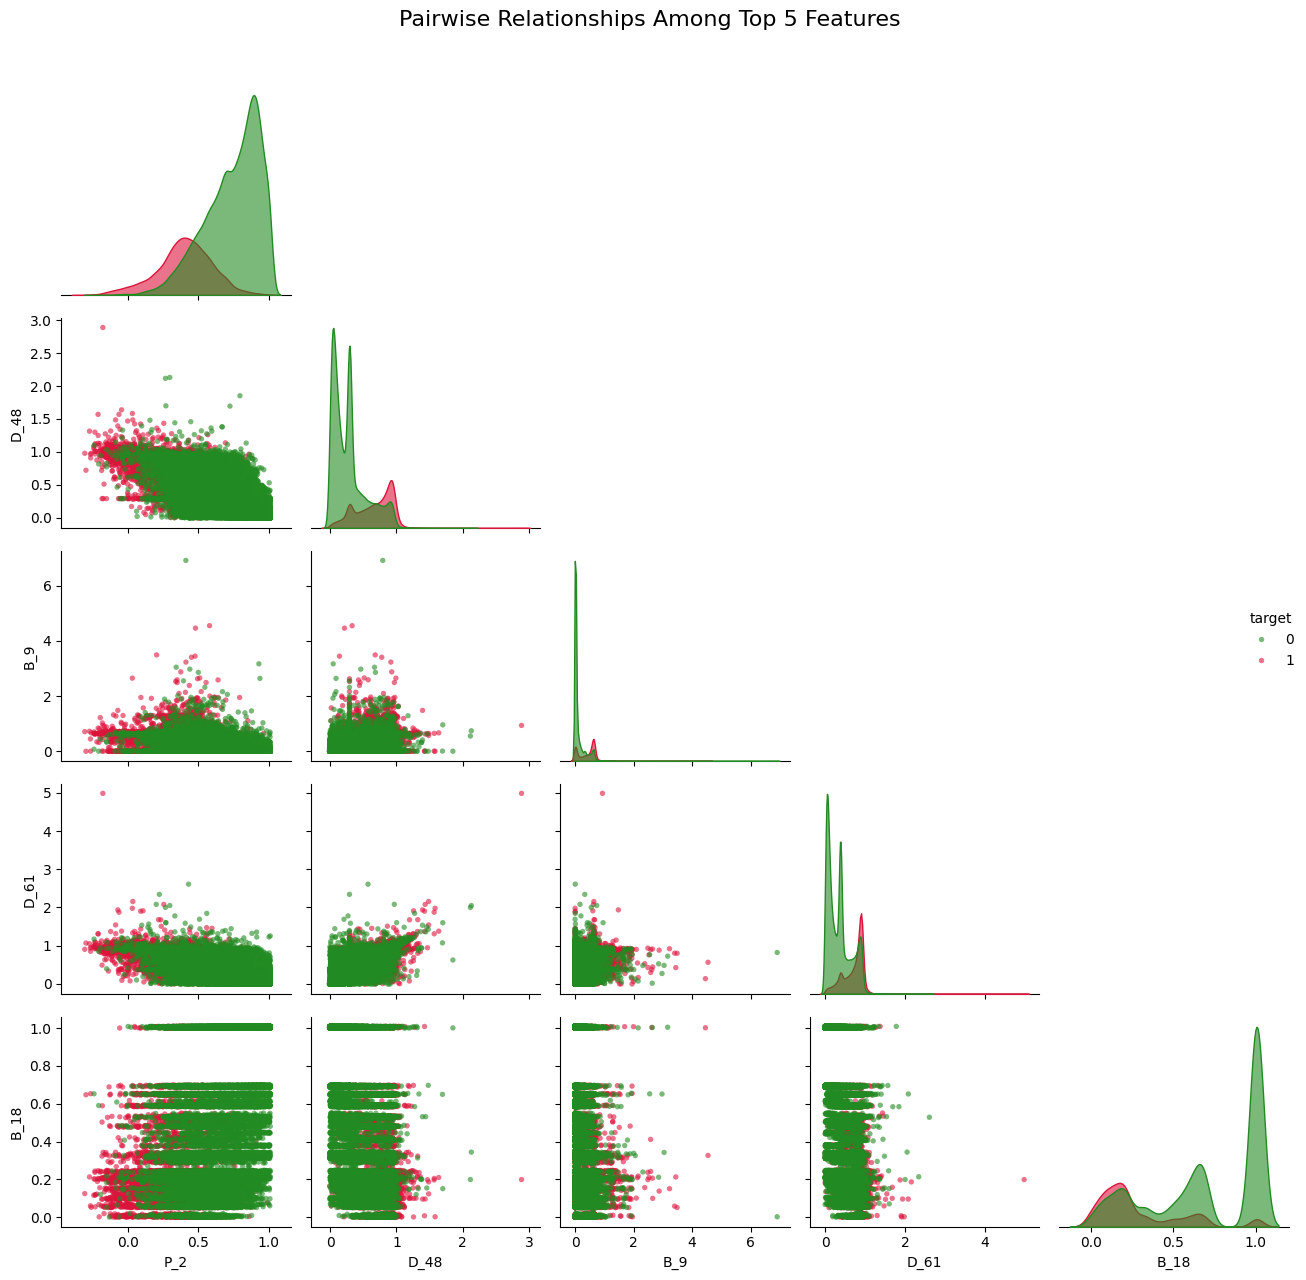


--- Detailed Feature Profiles ---

Feature: P_2
Basic statistics:
count    44251.000000
mean         0.654967
std          0.244209
min         -0.307321
25%          0.481461
50%          0.691177
75%          0.862757
max          1.009999
Name: P_2, dtype: float64
Mean for defaults: 0.3986
Mean for non-defaults: 0.7400
Difference: -0.3415

Feature: D_48
Basic statistics:
count    44251.000000
mean         0.371813
std          0.306209
min         -0.009603
25%          0.101931
50%          0.290671
75%          0.611835
max          2.889833
Name: D_48, dtype: float64
Mean for defaults: 0.6547
Mean for non-defaults: 0.2780
Difference: 0.3767

Feature: B_9
Basic statistics:
count    4.425100e+04
mean     1.899948e-01
std      2.759239e-01
min      2.137791e-07
25%      5.818796e-03
50%      2.694067e-02
75%      3.392796e-01
max      6.910414e+00
Name: B_9, dtype: float64
Mean for defaults: 0.4257
Mean for non-defaults: 0.1118
Difference: 0.3140

Feature: D_61
Basic statistics:
co

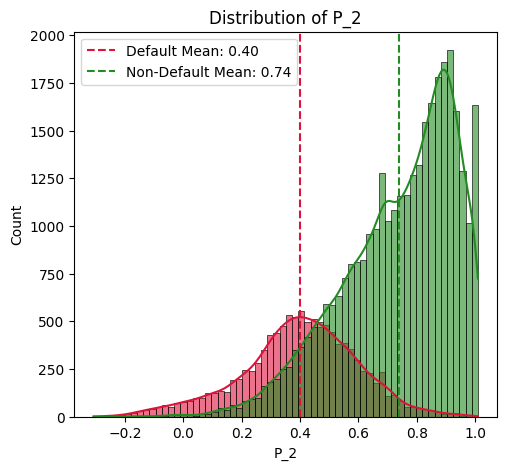

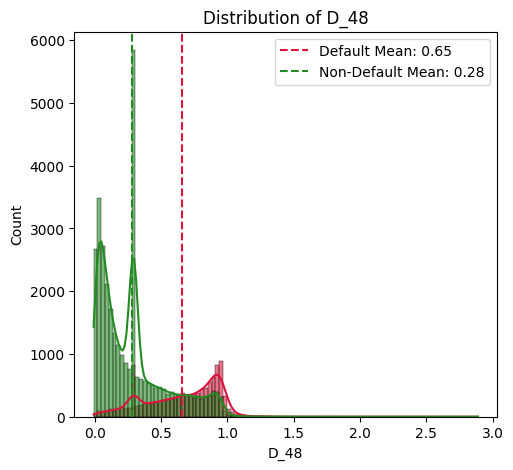

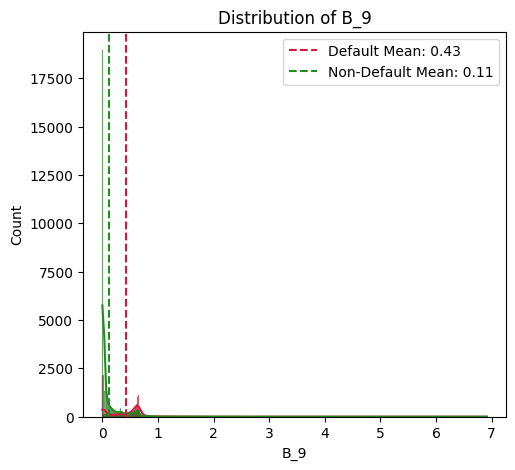

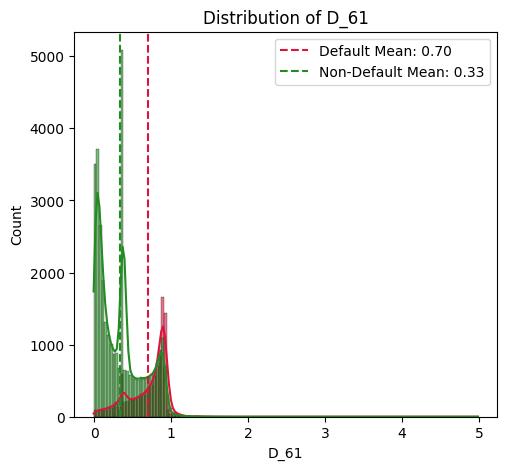

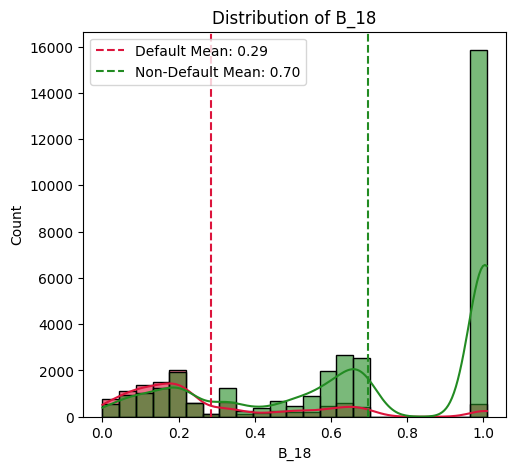

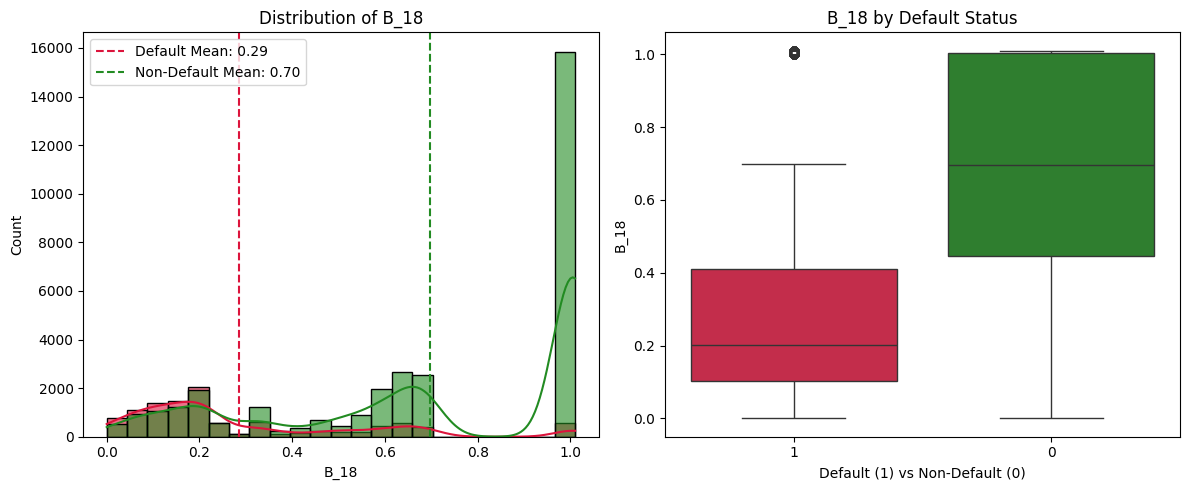

In [14]:
#  Examine Relationships Between Top Features

print("Analyzing relationships between top features...")

# 1. Select the top features based on correlation with target
top_features_count = 10  # Number of top features to analyze
top_feature_names = abs_correlations.head(top_features_count).index.tolist()

print(f"\nAnalyzing relationships among top {top_features_count} features:")
print(top_feature_names)

# 2. Create a correlation matrix of just these top features
top_features_data = sampled_data_processed[top_feature_names + ['target']]
top_features_corr = top_features_data.corr()

# 3. Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(top_features_corr, dtype=bool))  # Create mask for upper triangle

# Set up the matplotlib figure
sns.heatmap(
    top_features_corr,
    annot=True,           # Show correlation values
    fmt='.2f',            # Format to 2 decimal places
    cmap='coolwarm',      # Blue-red colormap
    mask=mask,            # Apply mask to show only lower triangle
    vmin=-1, vmax=1,      # Set color scale from -1 to 1
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Top Features', fontsize=16)
plt.tight_layout()
plt.show()

# 4. Check for redundancy among top features
print("\nChecking for potential redundancy among top features:")
redundancy_threshold = 0.7  # Threshold for considering features potentially redundant

# Find pairs with high correlation
high_corr_pairs = []
for i in range(len(top_feature_names)):
    for j in range(i+1, len(top_feature_names)):
        corr_value = abs(top_features_corr.iloc[i, j])
        if corr_value > redundancy_threshold:
            feature1 = top_features_corr.index[i]
            feature2 = top_features_corr.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

# Sort by correlation strength
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Display highly correlated pairs
if high_corr_pairs:
    print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|correlation| > {redundancy_threshold}):")
    for feat1, feat2, corr in high_corr_pairs:
        corr1_with_target = top_features_corr.loc[feat1, 'target']
        corr2_with_target = top_features_corr.loc[feat2, 'target']
        print(f"{feat1} & {feat2}: {corr:.4f} correlation")
        print(f"  • {feat1} correlation with target: {corr1_with_target:.4f}")
        print(f"  • {feat2} correlation with target: {corr2_with_target:.4f}")
        print(f"  • Recommendation: Consider keeping {feat1 if abs(corr1_with_target) > abs(corr2_with_target) else feat2} (stronger correlation with target)")
        print()
else:
    print("No highly correlated feature pairs found among top features.")

# 5. Visualize relationships between top 5 features and target
top_5_features = top_feature_names[:5]  # Take top 5 for pairplot
print(f"\nVisualizing relationships among top 5 features: {top_5_features}")

# Create a pairplot for the top 5 features
plt.figure(figsize=(15, 12))  # This will be ignored by pairplot but sets the context
sns.pairplot(
    sampled_data_processed[top_5_features + ['target']],
    hue='target',
    palette={0: 'forestgreen', 1: 'crimson'},
    corner=True,  # Only show lower triangle
    diag_kind='kde',  # Kernel density plots on diagonal
    plot_kws={'alpha': 0.6, 's': 15, 'edgecolor': 'none'},  # Scatter plot styling
    diag_kws={'alpha': 0.6, 'linewidth': 1}  # KDE plot styling
)
plt.suptitle('Pairwise Relationships Among Top 5 Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 6. For each top feature, create a detailed profile
print("\n--- Detailed Feature Profiles ---")
for feature in top_5_features:
    print(f"\nFeature: {feature}")

    # a. Basic statistics
    feature_stats = sampled_data_processed[feature].describe()
    print("Basic statistics:")
    print(feature_stats)

    # b. Statistics by target class
    default_mean = sampled_data_processed[sampled_data_processed['target'] == 1][feature].mean()
    non_default_mean = sampled_data_processed[sampled_data_processed['target'] == 0][feature].mean()
    print(f"Mean for defaults: {default_mean:.4f}")
    print(f"Mean for non-defaults: {non_default_mean:.4f}")
    print(f"Difference: {default_mean - non_default_mean:.4f}")

    # c. Visualization with both histogram and KDE
    plt.figure(figsize=(12, 5))

    # Left plot: Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(
        data=sampled_data_processed,
        x=feature,
        hue='target',
        palette={0: 'forestgreen', 1: 'crimson'},
        alpha=0.6,
        kde=True
    )
    plt.title(f'Distribution of {feature}')
    plt.axvline(default_mean, color='crimson', linestyle='--', label=f'Default Mean: {default_mean:.2f}')
    plt.axvline(non_default_mean, color='forestgreen', linestyle='--', label=f'Non-Default Mean: {non_default_mean:.2f}')
    plt.legend()

  # c. Visualization with both histogram and KDE
plt.figure(figsize=(12, 5))

# Left plot: Histogram
plt.subplot(1, 2, 1)
sns.histplot(
    data=sampled_data_processed,
    x=feature,
    hue='target',
    palette={0: 'forestgreen', 1: 'crimson'},
    alpha=0.6,
    kde=True
)
plt.title(f'Distribution of {feature}')
plt.axvline(default_mean, color='crimson', linestyle='--', label=f'Default Mean: {default_mean:.2f}')
plt.axvline(non_default_mean, color='forestgreen', linestyle='--', label=f'Non-Default Mean: {non_default_mean:.2f}')
plt.legend()

# Right plot: Box plot
plt.subplot(1, 2, 2)
# Convert 'target' to string before plotting
sns.boxplot(
    x='target',
    y=feature,
    data=sampled_data_processed.astype({'target': 'str'}), # Changed to convert target column to string
    palette={'0': 'forestgreen', '1': 'crimson'} # Changed to map palette to string categories
)
plt.title(f'{feature} by Default Status')
plt.xlabel('Default (1) vs Non-Default (0)')

plt.tight_layout()
plt.show()

In [15]:
# Step 9: Feature Engineering and Model Preparation

print("Preparing data for modeling through feature engineering...")

# Start with our processed data
model_data = sampled_data_processed.copy()

# 1. Create feature interaction terms for top features
print("\n--- Creating interaction features ---")
# Get top numerical features (previously identified)
top_numerical_features = [f for f in top_feature_names[:5] if f in model_data.columns]

if len(top_numerical_features) >= 2:
    print(f"Creating interaction terms among top features: {top_numerical_features}")

    # Create interactions between pairs of top features
    interaction_count = 0
    for i in range(len(top_numerical_features)):
        for j in range(i+1, len(top_numerical_features)):
            feat1 = top_numerical_features[i]
            feat2 = top_numerical_features[j]

            # Multiply features to create interaction
            interaction_name = f"{feat1}_x_{feat2}"
            model_data[interaction_name] = model_data[feat1] * model_data[feat2]
            interaction_count += 1

    print(f"Created {interaction_count} interaction features")
else:
    print("Not enough top numerical features identified for interactions")

# 2. Create polynomial features for top predictors
print("\n--- Creating polynomial features ---")
if top_numerical_features:
    poly_count = 0
    for feature in top_numerical_features[:3]:  # Limit to top 3 to avoid too many features
        # Create squared term
        model_data[f"{feature}_squared"] = model_data[feature] ** 2
        poly_count += 1

    print(f"Created {poly_count} polynomial features")
else:
    print("No top numerical features available for polynomial transformation")

# 3. Create ratio features for relevant pairs
print("\n--- Creating ratio features ---")
# Define groups where ratios might be meaningful
feature_groups = {
    'Delinquency': [col for col in model_data.columns if col.startswith('D_') and col not in categorical_features],
    'Spend': [col for col in model_data.columns if col.startswith('S_') and col != 'S_2'], # Exclude 'S_2' as it's a date
    'Payment': [col for col in model_data.columns if col.startswith('P_')],
    'Balance': [col for col in model_data.columns if col.startswith('B_') and col not in categorical_features],
    'Risk': [col for col in model_data.columns if col.startswith('R_')]
}

# For each group, identify potential ratio pairs
ratio_count = 0
for group, features in feature_groups.items():
    # Identify top 2 features in each group based on correlation with target
    if len(features) >= 2:
        # Ensure only numeric features are included in correlation calculation
        numeric_features = [f for f in features if pd.api.types.is_numeric_dtype(model_data[f])]
        if len(numeric_features) >= 2:  # Check if at least 2 numeric features exist
            group_correlations = model_data[numeric_features + ['target']].corr()['target'].drop('target')
            top_group_features = group_correlations.abs().sort_values(ascending=False).head(2).index.tolist()

            if len(top_group_features) >= 2:
                # Create ratio feature
                feat1 = top_group_features[0]
                feat2 = top_group_features[1]

                # Avoid division by zero by adding small constant
                model_data[f"{feat1}_to_{feat2}_ratio"] = model_data[feat1] / (model_data[feat2] + 1e-8)
                ratio_count += 1
        else:
            print(f"Skipping {group} group due to insufficient numeric features for ratio calculation.")

print(f"Created {ratio_count} ratio features between top features within groups")

# 4. Create aggregate features within groups
print("\n--- Creating aggregate features ---")
agg_count = 0
for group, features in feature_groups.items():
    if len(features) >= 3:  # Need at least 3 features for meaningful aggregation
        numeric_features = [f for f in features if pd.api.types.is_numeric_dtype(model_data[f])]

        if numeric_features:
            # Mean within group
            model_data[f"{group}_mean"] = model_data[numeric_features].mean(axis=1)

            # Standard deviation within group (measure of variability)
            model_data[f"{group}_std"] = model_data[numeric_features].std(axis=1)

            # Max value within group
            model_data[f"{group}_max"] = model_data[numeric_features].max(axis=1)

            agg_count += 3

print(f"Created {agg_count} aggregate features across feature groups")

# 5. One-hot encode categorical features
print("\n--- Encoding categorical features ---")
categorical_features = [f for f in categorical_features if f in model_data.columns]

if categorical_features:
    # Create dummy variables for categorical features
    model_data_encoded = pd.get_dummies(
        model_data,
        columns=categorical_features,
        drop_first=True,  # Drop first category to avoid multicollinearity
        dummy_na=False    # We've already handled missing values
    )

    print(f"One-hot encoded {len(categorical_features)} categorical features")
    print(f"Feature count before encoding: {model_data.shape[1]}")
    print(f"Feature count after encoding: {model_data_encoded.shape[1]}")

    # Replace original dataframe with encoded version
    model_data = model_data_encoded
else:
    print("No categorical features to encode")

# 6. Feature scaling for model-ready data
print("\n--- Scaling numerical features ---")
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = model_data.drop(columns=['customer_ID', 'target'])
y = model_data['target']

# Identify numerical columns to scale
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Apply standard scaling
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(f"Scaled {len(numerical_cols)} numerical features")

# 7. Save the final model-ready dataset
final_data = pd.concat([X, y], axis=1)
final_data['customer_ID'] = model_data['customer_ID']  # Add back customer ID

print("\n--- Final dataset statistics ---")
print(f"Total observations: {final_data.shape[0]}")
print(f"Total features: {final_data.shape[1] - 2}")  # Subtract customer_ID and target
print(f"Original features: {sampled_data.shape[1] - 2}")
print(f"Engineered features: {final_data.shape[1] - sampled_data.shape[1]}")

# Save the prepared dataset
final_data.to_csv('amex_model_ready_data.csv', index=False)
print("\nSaved model-ready dataset to 'amex_model_ready_data.csv'")

Preparing data for modeling through feature engineering...

--- Creating interaction features ---
Creating interaction terms among top features: ['P_2', 'D_48', 'B_9', 'D_61', 'B_18']
Created 10 interaction features

--- Creating polynomial features ---
Created 3 polynomial features

--- Creating ratio features ---
Created 5 ratio features between top features within groups

--- Creating aggregate features ---
Created 15 aggregate features across feature groups

--- Encoding categorical features ---
One-hot encoded 11 categorical features
Feature count before encoding: 206
Feature count after encoding: 239

--- Scaling numerical features ---
Scaled 192 numerical features

--- Final dataset statistics ---
Total observations: 44251
Total features: 237
Original features: 189
Engineered features: 48

Saved model-ready dataset to 'amex_model_ready_data.csv'


### Why Feature Engineering Is Important

Feature engineering prepares data for modeling by transforming it into useful features. It helps by:

- Using patterns to create new predictors.
- Improving model performance with domain-specific features.
- Capturing nonlinear relationships using polynomial and interaction terms.
- Incorporating domain knowledge like financial ratios.

It organizes data further by:
- Adding interaction and polynomial features.
- Building ratio and aggregate features.
- Encoding categories and scaling numbers for compatibility.




Loading and preparing data...

Training Logistic Regression...
Logistic Regression training time: 23.78 seconds

Training LightGBM...
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 8268, number of negative: 24920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48844
[LightGBM] [Info] Number of data points in the train set: 33188, number of used features: 239
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249126 -> initscore=-1.103278
[LightGBM] [Info] Start training from score -1.103278
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9

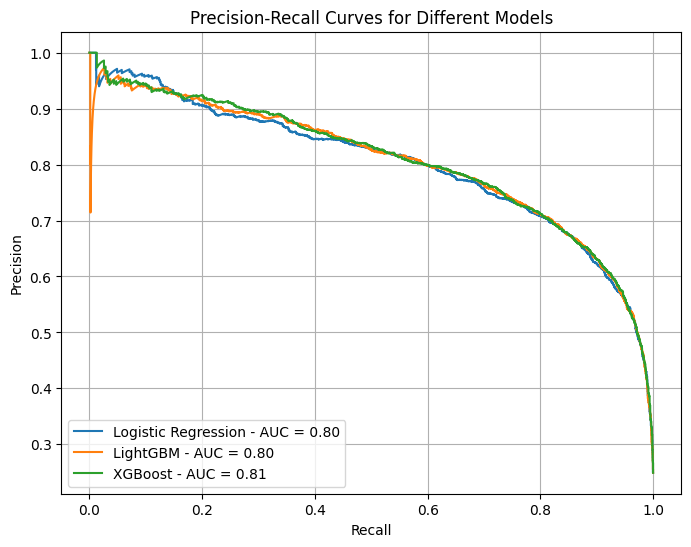

In [17]:
# Step 10: Model Building and Evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
import time

# 1. Load data and prepare for modeling
print("Loading and preparing data...")
model_data = pd.read_csv('amex_model_ready_data.csv')

# Convert 'S_2' to datetime and extract numerical features
# Assuming 'S_2' is a date column
model_data['S_2'] = pd.to_datetime(model_data['S_2'], errors='coerce')  # Handle potential errors
model_data['S_2_year'] = model_data['S_2'].dt.year
model_data['S_2_month'] = model_data['S_2'].dt.month
model_data['S_2_day'] = model_data['S_2'].dt.day

# Drop the original 'S_2' column
model_data = model_data.drop('S_2', axis=1)

# Split features and target
X = model_data.drop(['customer_ID', 'target'], axis=1)
y = model_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# 2. Define the models and parameters
models = models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(objective='binary', metric='auc', boosting_type='gbdt', num_leaves=31, learning_rate=0.05, feature_fraction=0.9, random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', max_depth=6, learning_rate=0.05, subsample=0.8, random_state=42)
}


# 3. Function to train, evaluate, and plot
def evaluate_model(model, name, X_train, y_train, X_val, y_val):
    print(f"\nTraining {name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Evaluate
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    train_time = time.time() - start_time

    # Calculate and plot Precision-Recall curve

    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f'{name} - AUC = {pr_auc:.2f}')
    print(f"{name} training time: {time.time() - start_time:.2f} seconds")

# 4. Evaluate and plot for all models
plt.figure(figsize=(8, 6))
for name, model in models.items():
    evaluate_model(model, name, X_train, y_train, X_val, y_val)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


#     # Storing the results
#     results.append({
#         'Model': name,
#         'Accuracy': accuracy,
#         'ROC AUC': roc_auc,
#         'Training Time': train_time,
#         'model_object': model
#     })

#     print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}, Time: {train_time:.2f}s")
#     print(classification_report(y_val, y_pred))

# # 4. Compare models and visualize results
# results_df = pd.DataFrame(results).set_index('Model')
# display_cols = [col for col in results_df.columns if col != 'model_object']
# print("\n=== Model Comparison ===")
# print(results_df[display_cols])

# # Plot results
# plt.figure(figsize=(10, 6))
# results_df[['Accuracy', 'ROC AUC']].plot(kind='bar', rot=0)
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.ylim(0, 1)
# plt.tight_layout()
# plt.show()

# # 5. Feature importance for best model
# best_model_name = results_df['ROC AUC'].idxmax()
# best_model = models[best_model_name]
# print(f"\nAnalyzing feature importance for {best_model_name}...")

# # Get feature importance
# if hasattr(best_model, 'feature_importances_'):
#     importance = best_model.feature_importances_
#     feature_imp = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': importance
#     }).sort_values('Importance', ascending=False)

#     # Plot top 15 features
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))
#     plt.title(f'Top 15 Features by Importance - {best_model_name}')
#     plt.tight_layout()
#     plt.show()

# # 6. Save best model
# import pickle
# best_model_file = f'amex_default_model_{best_model_name.replace(" ", "_").lower()}.pkl'
# with open(best_model_file, 'wb') as f:
#     pickle.dump(best_model, f)
# print(f"Best model saved to {best_model_file}")